In [ ]:
# 코랩 환경 한글 글꼴 설치, 설치 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# [0] 데이터로드, 기본 전처리

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dacon/23_제주특산물가격예측/data/train.csv', encoding = 'utf-8')
data.head()

ID   timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   

   price(원/kg)  
0          0.0  
1          0.0  
2       1728.0  
3       1408.0  
4       1250.0

In [ ]:
trade = pd.read_csv('/content/drive/MyDrive/Dacon/23_제주특산물가격예측/data/international_trade.csv', encoding = 'utf-8')
trade.head()

기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지
0  2019-01  토마토(신선한 것이나 냉장한 것으로 한정한다)  356571    990        0      0   990
1  2019-01                         양파  821330    222  4003206   1118  -896
2  2019-01                         쪽파      60      1    93405    128  -127
3  2019-01       꽃양배추와 브로콜리(broccoli)     160      1   638913    563  -562
4  2019-01                  방울다다기 양배추       0      0     7580     38   -38

In [ ]:
# 연월일 추가
data['year'] = data['timestamp'].apply(lambda x : int(x[0:4]))
data['month'] = data['timestamp'].apply(lambda x : int(x[5:7]))
data['day'] = data['timestamp'].apply(lambda x : int(x[8:10]))

In [ ]:
# 연월일 추가 (무역 데이터)
trade['year'] =  trade['기간'].apply(lambda x : int(x[0:4]))
trade['month'] =  trade['기간'].apply(lambda x : int(x[5:7]))

In [ ]:
def to_season( x ):
    if x in [12, 1, 2]:
        return '겨울' # 겨울
    elif x in [3, 4, 5]:
        return '봄' # 봄
    elif x in [6, 7, 8]:
        return '여름' # 여름
    else:
        return '가을' # 가을
    pass

trade['계절'] = trade['month'].apply(lambda x : to_season(x))
trade.head(2)

기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지  \
0  2019-01  토마토(신선한 것이나 냉장한 것으로 한정한다)  356571    990        0      0   990   
1  2019-01                         양파  821330    222  4003206   1118  -896   

   year  month  계절  
0  2019      1  겨울  
1  2019      1  겨울

In [ ]:
def to_quarter( x ):
    if x in [1,2,3]:
        return '1분기' # 1분기
    elif x in [4,5,6]:
        return '2분기' # 2분기
    elif x in [7, 8, 9]:
        return '3분기' # 3분기
    else:
        return '4분기' # 4분기
    pass

trade['분기'] = trade['month'].apply(lambda x : to_quarter(x))
trade.head(2)

기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지  \
0  2019-01  토마토(신선한 것이나 냉장한 것으로 한정한다)  356571    990        0      0   990   
1  2019-01                         양파  821330    222  4003206   1118  -896   

   year  month  계절   분기  
0  2019      1  겨울  1분기  
1  2019      1  겨울  1분기

In [ ]:
trade

기간                              품목명    수출 중량  수출 금액    수입 중량  \
0     2019-01        토마토(신선한 것이나 냉장한 것으로 한정한다)   356571    990        0   
1     2019-01                               양파   821330    222  4003206   
2     2019-01                               쪽파       60      1    93405   
3     2019-01             꽃양배추와 브로콜리(broccoli)      160      1   638913   
4     2019-01                        방울다다기 양배추        0      0     7580   
...       ...                              ...      ...    ...      ...   
1269  2023-02           포포(papaw)[파파야(papaya)]        0      0    23830   
1270  2023-02                               사과   135165    351        0   
1271  2023-02                                배  2206012   5411        1   
1272  2023-02  신 체리[프루너스 체라서스(Prunus cerasus)]        5      0        0   
1273  2023-02                               자두        0      0        2   

      수입 금액  무역수지  year  month  계절   분기  
0         0   990  2019      1  겨울  1분기  
1      1118  -896  2019      1  겨울  1분기  
2       128  -127  2019      1  겨울  1분기  
3       563  -562  2019      1  겨울  1분기  
4        38   -38  2019      1  겨울  1분기  
...     ...   ...   ...    ...  ..  ...  
1269     71   -71  2023      2  겨울  1분기  
1270      0   351  2023      2  겨울  1분기  
1271      0  5411  2023      2  겨울  1분기  
1272      0     0  2023      2  겨울  1분기  
1273      0     0  2023      2  겨울  1분기  

[1274 rows x 11 columns]

In [ ]:
# 요일 추가
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day_of_week'] = data['timestamp'].dt.day_name()
data['day_of_week_num'] = data['timestamp'].dt.dayofweek
data.head(10)

ID  timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2  TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3  TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4  TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
5  TG_A_J_20190106 2019-01-06   TG           A        J         0.0   
6  TG_A_J_20190107 2019-01-07   TG           A        J     44995.0   
7  TG_A_J_20190108 2019-01-08   TG           A        J     26975.0   
8  TG_A_J_20190109 2019-01-09   TG           A        J     29265.0   
9  TG_A_J_20190110 2019-01-10   TG           A        J     21226.0   

   price(원/kg)  year  month  day day_of_week  day_of_week_num  
0          0.0  2019      1    1     Tuesday                1  
1          0.0  2019      1    2   Wednesday                2  
2       1728.0  2019      1    3    Thursday                3  
3       1408.0  2019      1    4      Friday                4  
4       1250.0  2019      1    5    Saturday                5  
5          0.0  2019      1    6      Sunday                6  
6       1474.0  2019      1    7      Monday                0  
7       1326.0  2019      1    8     Tuesday                1  
8       1428.0  2019      1    9   Wednesday                2  
9       1433.0  2019      1   10    Thursday                3

In [ ]:
trade['연월']= trade['year'].astype(str) + '-' + trade['month'].astype(str)
data['연월'] = data['year'].astype(str) + '-' + data['month'].astype(str)

In [ ]:
data

ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
59392  RD_F_J_20230227 2023-02-27   RD           F        J    452440.0   
59393  RD_F_J_20230228 2023-02-28   RD           F        J    421980.0   
59394  RD_F_J_20230301 2023-03-01   RD           F        J    382980.0   
59395  RD_F_J_20230302 2023-03-02   RD           F        J    477220.0   
59396  RD_F_J_20230303 2023-03-03   RD           F        J    427520.0   

       price(원/kg)  year  month  day day_of_week  day_of_week_num      연월  
0              0.0  2019      1    1     Tuesday                1  2019-1  
1              0.0  2019      1    2   Wednesday                2  2019-1  
2           1728.0  2019      1    3    Thursday                3  2019-1  
3           1408.0  2019      1    4      Friday                4  2019-1  
4           1250.0  2019      1    5    Saturday                5  2019-1  
...            ...   ...    ...  ...         ...              ...     ...  
59392        468.0  2023      2   27      Monday                0  2023-2  
59393        531.0  2023      2   28     Tuesday                1  2023-2  
59394        574.0  2023      3    1   Wednesday                2  2023-3  
59395        523.0  2023      3    2    Thursday                3  2023-3  
59396        529.0  2023      3    3      Friday                4  2023-3  

[59397 rows x 13 columns]

In [ ]:
trade

기간                              품목명    수출 중량  수출 금액    수입 중량  \
0     2019-01        토마토(신선한 것이나 냉장한 것으로 한정한다)   356571    990        0   
1     2019-01                               양파   821330    222  4003206   
2     2019-01                               쪽파       60      1    93405   
3     2019-01             꽃양배추와 브로콜리(broccoli)      160      1   638913   
4     2019-01                        방울다다기 양배추        0      0     7580   
...       ...                              ...      ...    ...      ...   
1269  2023-02           포포(papaw)[파파야(papaya)]        0      0    23830   
1270  2023-02                               사과   135165    351        0   
1271  2023-02                                배  2206012   5411        1   
1272  2023-02  신 체리[프루너스 체라서스(Prunus cerasus)]        5      0        0   
1273  2023-02                               자두        0      0        2   

      수입 금액  무역수지  year  month  계절   분기      연월  
0         0   990  2019      1  겨울  1분기  2019-1  
1      1118  -896  2019      1  겨울  1분기  2019-1  
2       128  -127  2019      1  겨울  1분기  2019-1  
3       563  -562  2019      1  겨울  1분기  2019-1  
4        38   -38  2019      1  겨울  1분기  2019-1  
...     ...   ...   ...    ...  ..  ...     ...  
1269     71   -71  2023      2  겨울  1분기  2023-2  
1270      0   351  2023      2  겨울  1분기  2023-2  
1271      0  5411  2023      2  겨울  1분기  2023-2  
1272      0     0  2023      2  겨울  1분기  2023-2  
1273      0     0  2023      2  겨울  1분기  2023-2  

[1274 rows x 12 columns]

In [ ]:
data

ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
59392  RD_F_J_20230227 2023-02-27   RD           F        J    452440.0   
59393  RD_F_J_20230228 2023-02-28   RD           F        J    421980.0   
59394  RD_F_J_20230301 2023-03-01   RD           F        J    382980.0   
59395  RD_F_J_20230302 2023-03-02   RD           F        J    477220.0   
59396  RD_F_J_20230303 2023-03-03   RD           F        J    427520.0   

       price(원/kg)  year  month  day day_of_week  day_of_week_num      연월  
0              0.0  2019      1    1     Tuesday                1  2019-1  
1              0.0  2019      1    2   Wednesday                2  2019-1  
2           1728.0  2019      1    3    Thursday                3  2019-1  
3           1408.0  2019      1    4      Friday                4  2019-1  
4           1250.0  2019      1    5    Saturday                5  2019-1  
...            ...   ...    ...  ...         ...              ...     ...  
59392        468.0  2023      2   27      Monday                0  2023-2  
59393        531.0  2023      2   28     Tuesday                1  2023-2  
59394        574.0  2023      3    1   Wednesday                2  2023-3  
59395        523.0  2023      3    2    Thursday                3  2023-3  
59396        529.0  2023      3    3      Friday                4  2023-3  

[59397 rows x 13 columns]

# [1] 각 품목별, 요일별 거래금액
- TG : 감귤
- CR : 브로콜리
- CB : 무
- RD : 당근
- BC : 양배추

--------------------------------------------------
**Insight**

<br/>

1) 각 품목별 일요일의 평균 거래금액은 0원에 가깝다. (다른요일과의 급격한 차이 발생)
-> 0으로 처리해주는것이 오히려 성능의 향상을 기대해볼 수 있다.

In [ ]:
tmp = data.groupby(['item','day_of_week']).mean().reset_index()[['item', 'day_of_week', 'price(원/kg)']]
tmp

<ipython-input-5-82c2344e85f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby(['item','day_of_week']).mean().reset_index()[['item', 'day_of_week', 'price(원/kg)']]


item day_of_week  price(원/kg)
0    BC      Friday  1057.133537
1    BC      Monday  1073.109575
2    BC    Saturday  1035.228367
3    BC      Sunday     3.920635
4    BC    Thursday  1079.277268
5    BC     Tuesday  1049.667176
6    BC   Wednesday  1070.203364
7    CB      Friday   187.642202
8    CB      Monday   188.648848
9    CB    Saturday   158.564055
10   CB      Sunday     0.921659
11   CB    Thursday   176.014679
12   CB     Tuesday   173.998165
13   CB   Wednesday   179.022936
14   CR      Friday   344.909567
15   CR      Monday   359.781435
16   CR    Saturday   177.480579
17   CR      Sunday     0.000000
18   CR    Thursday   346.230668
19   CR     Tuesday   338.001311
20   CR   Wednesday   344.134993
21   RD      Friday   228.418005
22   RD      Monday   228.807028
23   RD    Saturday   157.078917
24   RD      Sunday     1.589286
25   RD    Thursday   226.404817
26   RD     Tuesday   237.536124
27   RD   Wednesday   228.883601
28   TG      Friday  3762.806881
29   TG      Monday  3767.743318
30   TG    Saturday  3399.587558
31   TG      Sunday     9.741935
32   TG    Thursday  3743.673853
33   TG     Tuesday  3806.074771
34   TG   Wednesday  3741.661927

In [ ]:
# 요일별로 정렬되도록 categorical 처리
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tmp['day_of_week'] = pd.Categorical(tmp['day_of_week'], categories=weekdays, ordered=True)
tmp

item day_of_week  price(원/kg)
0    BC      Friday  1057.133537
1    BC      Monday  1073.109575
2    BC    Saturday  1035.228367
3    BC      Sunday     3.920635
4    BC    Thursday  1079.277268
5    BC     Tuesday  1049.667176
6    BC   Wednesday  1070.203364
7    CB      Friday   187.642202
8    CB      Monday   188.648848
9    CB    Saturday   158.564055
10   CB      Sunday     0.921659
11   CB    Thursday   176.014679
12   CB     Tuesday   173.998165
13   CB   Wednesday   179.022936
14   CR      Friday   344.909567
15   CR      Monday   359.781435
16   CR    Saturday   177.480579
17   CR      Sunday     0.000000
18   CR    Thursday   346.230668
19   CR     Tuesday   338.001311
20   CR   Wednesday   344.134993
21   RD      Friday   228.418005
22   RD      Monday   228.807028
23   RD    Saturday   157.078917
24   RD      Sunday     1.589286
25   RD    Thursday   226.404817
26   RD     Tuesday   237.536124
27   RD   Wednesday   228.883601
28   TG      Friday  3762.806881
29   TG      Monday  3767.743318
30   TG    Saturday  3399.587558
31   TG      Sunday     9.741935
32   TG    Thursday  3743.673853
33   TG     Tuesday  3806.074771
34   TG   Wednesday  3741.661927

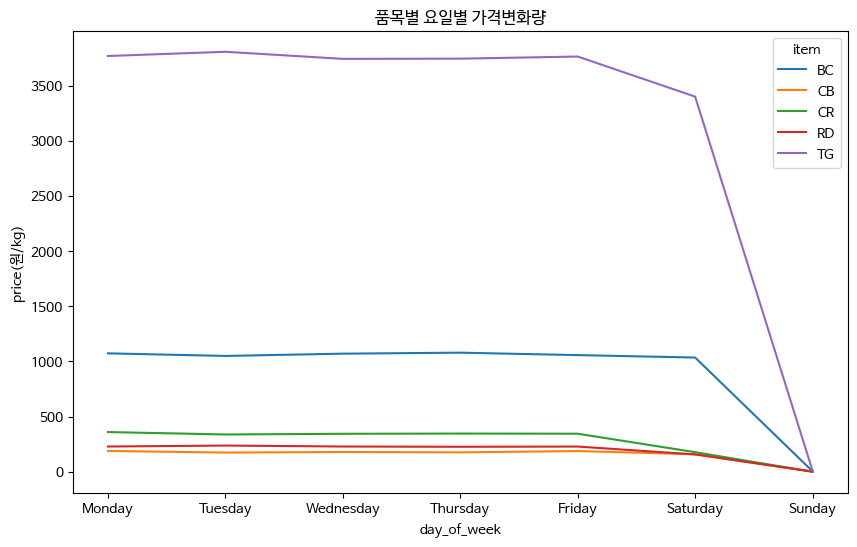

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp, x='day_of_week', y='price(원/kg)', hue='item')
plt.title('품목별 요일별 가격변화량')
plt.show()

'''
일요일에 각 품목별 0에 가까운 수치를 보이지만 0은 아니다.
'''

[+insight+]
- 일요일에 각 품목별 0에 가까운 수치를 보이지만 0은 아니다.
- 토요일은 평일에 비해 소폭 감소되는 가격을 보인다.

In [ ]:
sunday_data = data[data["day_of_week"] == "Sunday"]
price_data = sunday_data[sunday_data["price(원/kg)"] == 0]
item_counts = price_data.groupby("item").size()
a = sunday_data.groupby("item").size()

item_counts

item
BC    1949
CB    1084
CR    1519
RD    1730
TG    2160
dtype: int64

In [ ]:
c = pd.DataFrame(a - item_counts).reset_index()
c

item   0
0   BC   4
1   CB   1
2   CR   0
3   RD   6
4   TG  10

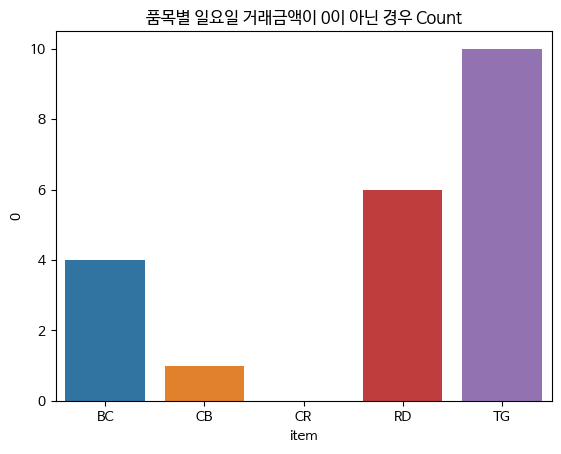

In [ ]:
sns.barplot(x = 'item', y = 0, data = c)

plt.title('품목별 일요일 거래금액이 0이 아닌 경우 Count')

plt.show()

(+)
일요일 거래금액이 0이 아닌 경우는 극소량이다.
-> 일요일 예측금액은 0으로 반환하도록 하자

# [2] 항목별 월별 거래금액 추이 확인

- 각 항목별, 월별 거래금액의 변동 확인

In [ ]:
tmp_2 = data.groupby(['item','month']).mean().reset_index()[['item', 'month', 'price(원/kg)']]
tmp_2

<ipython-input-60-dcf67f11d396>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_2 = data.groupby(['item','month']).mean().reset_index()[['item', 'month', 'price(원/kg)']]


item  month  price(원/kg)
0    BC      1  1569.317563
1    BC      2  1363.751773
2    BC      3  1728.202975
3    BC      4  1893.181481
4    BC      5   431.945341
5    BC      6     1.200000
6    BC      7     0.000000
7    BC      8     0.000000
8    BC      9     0.000000
9    BC     10   205.982975
10   BC     11  1594.237037
11   BC     12  1882.879928
12   CB      1   310.451613
13   CB      2   369.929078
14   CB      3   383.930709
15   CB      4   292.000000
16   CB      5    97.080645
17   CB      6     6.850000
18   CB      7     1.835484
19   CB      8     4.314516
20   CB      9     0.000000
21   CB     10     7.708065
22   CB     11    93.511667
23   CB     12   176.629032
24   CR      1   619.075576
25   CR      2   568.591692
26   CR      3   536.659168
27   CR      4   308.326190
28   CR      5    75.298387
29   CR      6    64.029762
30   CR      7    67.474654
31   CR      8    74.347926
32   CR      9    83.186905
33   CR     10    82.534562
34   CR     11   146.647619
35   CR     12   502.065668
36   RD      1   347.627419
37   RD      2   291.963652
38   RD      3   275.096457
39   RD      4   254.776042
40   RD      5   260.403226
41   RD      6   189.055208
42   RD      7    67.900202
43   RD      8    54.562500
44   RD      9    50.412500
45   RD     10    68.197581
46   RD     11    71.696875
47   RD     12   250.660282
48   TG      1  1588.269032
49   TG      2  2030.600000
50   TG      3  3299.605512
51   TG      4  3899.407500
52   TG      5  5419.036290
53   TG      6  5132.016667
54   TG      7  4746.010484
55   TG      8  4586.666129
56   TG      9  3875.809167
57   TG     10  1561.098387
58   TG     11  1266.468333
59   TG     12  1323.106452

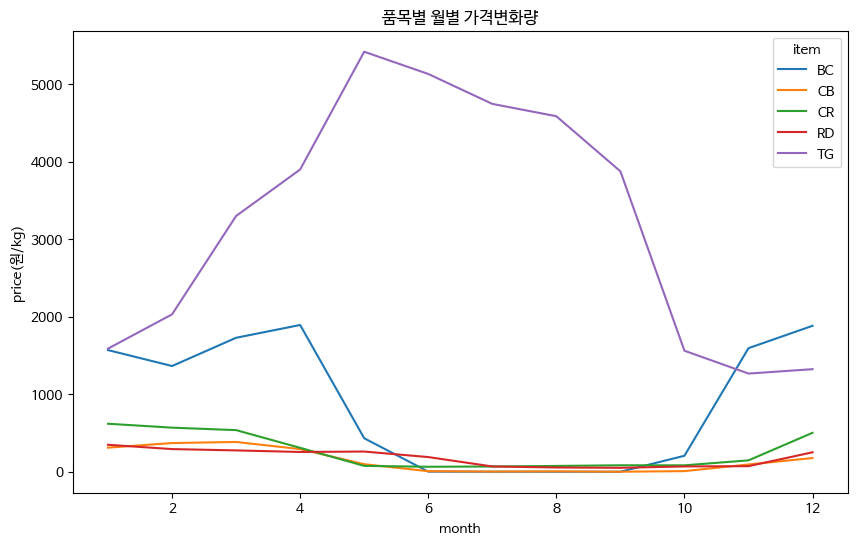

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp_2, x='month', y='price(원/kg)', hue='item')
plt.title('품목별 월별 가격변화량')
plt.show()

- TG : 감귤
- CR : 브로콜리
- CB : 무
- RD : 당근
- BC : 양배추

--------------------------------------------------
**Insight**

<br/>

0) 예측해야하는 test data의 범위는 3월로 모든 품목의 거래금액 평균이 0에 **수렴하지 않는다**.

1) TG (감귤) : 감귤은 제철인 가을 ~ 겨울철에 가격이 안정되지만, 초봄(3월) 부터 가격이 급상승하며 가을까지 여름까지 유지된다.
<br/>

2) BC (양배추) : 양배추는 늦봄 ~ 여름까지 가격이 안정되는 추세를 보이며, 가을~겨울은 높은 가격을 유지함
<br/>

3) CR (브로콜리) : 브로콜리는 봄-초가을까지 안정적인 추이를 보이지만
겨울~초봄까지 높은 가격을 유지한다.
<br/>

4) RD (당근) : 당근은 가장 안정적인 평평한 추이를 보인다.
<br/>

5) CB (무) : 무는 겨울~봄에 높은 가격을 보이나 급격한 차이가 발생하지는 않는다.

# [3] 항목별 일별 거래금액 추이 확인

- 각 항목별, 일별 거래금액의 변동 확인

In [ ]:
tmp_3 = data.groupby(['item','day']).mean().reset_index()[['item', 'day', 'price(원/kg)']]
tmp_3

<ipython-input-11-ea1b446af79e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_3 = data.groupby(['item','day']).mean().reset_index()[['item', 'day', 'price(원/kg)']]


item  day  price(원/kg)
0     BC    1   707.716776
1     BC    2   812.623094
2     BC    3   929.084967
3     BC    4  1086.320000
4     BC    5   893.584444
..   ...  ...          ...
150   TG   27  3326.728000
151   TG   28  3322.480000
152   TG   29  3299.695652
153   TG   30  3311.122222
154   TG   31  3218.586207

[155 rows x 3 columns]

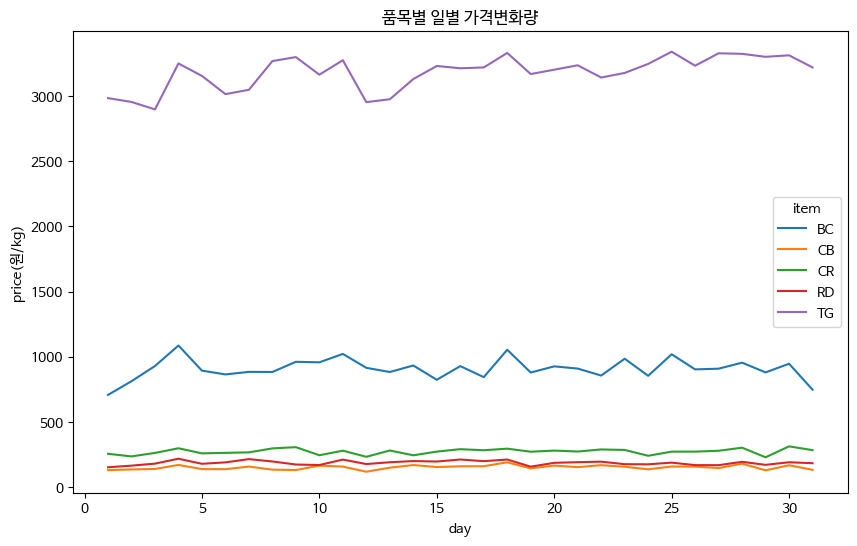

In [ ]:
# 그래프 그리기
# 큰 의미없다
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp_3, x='day', y='price(원/kg)', hue='item')
plt.title('품목별 일별 가격변화량')
plt.show()

- 일별 변화량은 유의미하다고 판단하기는 어렵다.

# [4] 항목별 금액 변동 추이 확인 (전체기간)

- 모든 농산품은 파종기, 정식기, 수확기를 거친다.  
- 참고 : https://www.nongsaro.go.kr/portal/ps/psb/psbl/workScheduleLst.ps?menuId=PS00087&code=210001
- 수확시기와 판매시기가 차이가 있는듯하다.


In [ ]:
tmp_4 = data.loc[data['day_of_week'] != 'Sunday' ] # 스무스한 그림을 위해 일요일은 제외하고 그려보자

In [ ]:
tmp_4 = tmp_4.groupby(['item','timestamp']).mean().reset_index()[['item', 'timestamp', 'price(원/kg)']]
tmp_4

<ipython-input-15-c8a13082ad6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_4 = tmp_4.groupby(['item','timestamp']).mean().reset_index()[['item', 'timestamp', 'price(원/kg)']]


item  timestamp  price(원/kg)
0      BC 2019-01-01     0.000000
1      BC 2019-01-02     0.000000
2      BC 2019-01-03  1544.222222
3      BC 2019-01-04  1775.666667
4      BC 2019-01-05  1736.777778
...   ...        ...          ...
6525   TG 2023-02-27  3308.400000
6526   TG 2023-02-28  2982.000000
6527   TG 2023-03-01  3495.400000
6528   TG 2023-03-02  3340.300000
6529   TG 2023-03-03  3492.200000

[6530 rows x 3 columns]

## [4-1] 전체

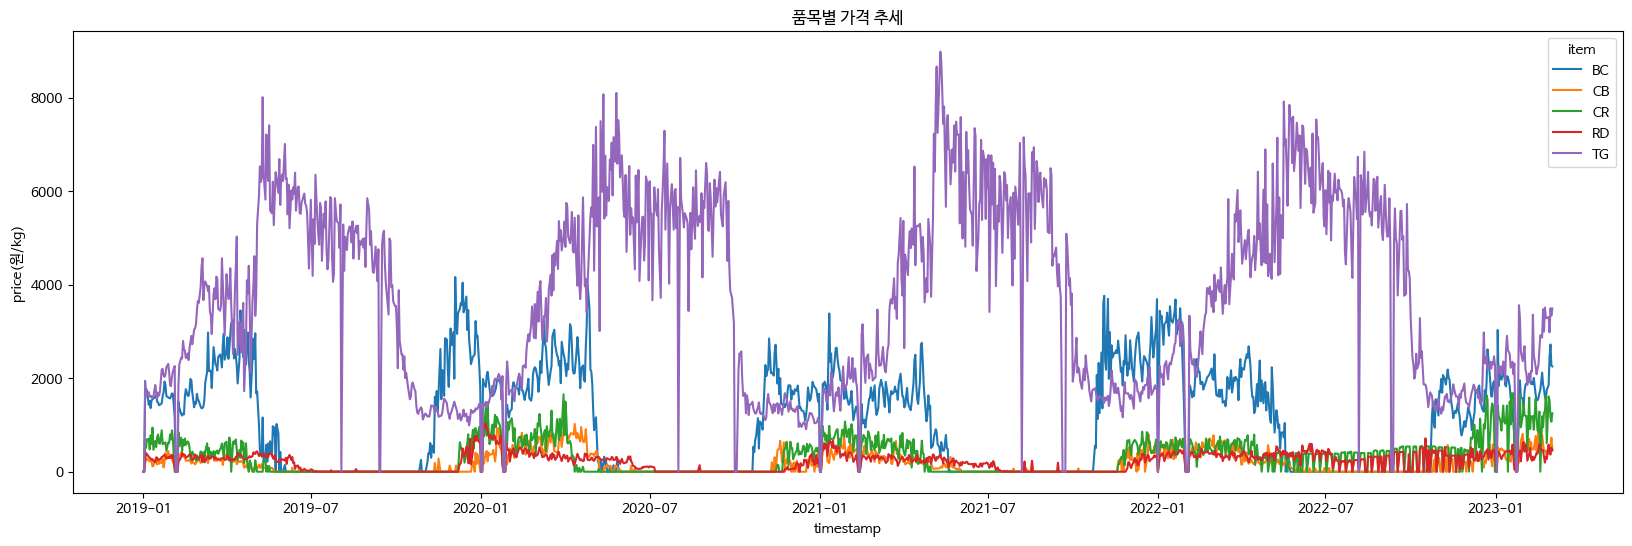

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4, x='timestamp', y='price(원/kg)', hue='item')
plt.title('품목별 가격 추세')
plt.show()

# 특정 구간이 모두 0인 경우가 있다.
# 20년부터 코로나 발생시기라고 했을때, 코로나의 영향은 가격에 큰 영향을 미치지는 않은것으로 보인다.

## [4-2] BC (양배추)
- 제주의 날씨는 여름에 양배추를


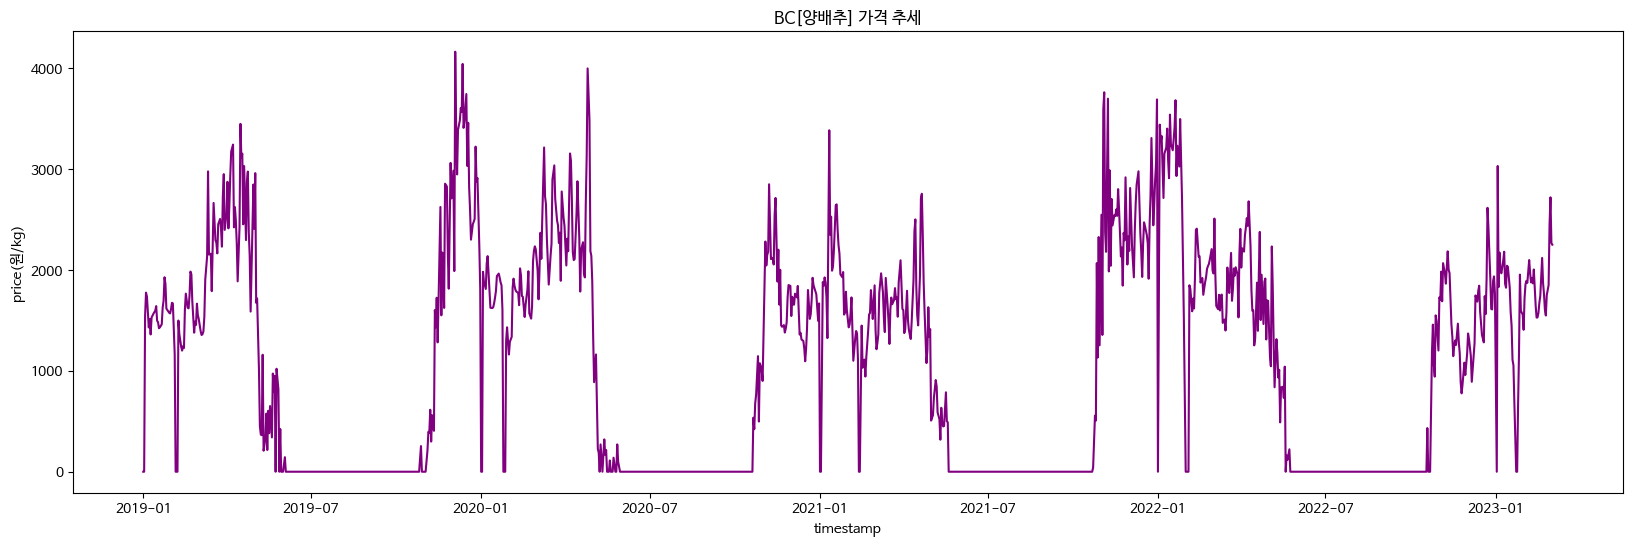

In [ ]:
tmp_4_BC = tmp_4.loc[tmp_4['item'] == 'BC' ]
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4_BC, x='timestamp', y='price(원/kg)', c = 'Purple')
plt.title('BC[양배추] 가격 추세')
plt.show()

# BC는 일정기간동안 거래가 발생하지 않는듯 하다 (6월 ~ 10월 정도)

## [4-3] CB(브로콜리)

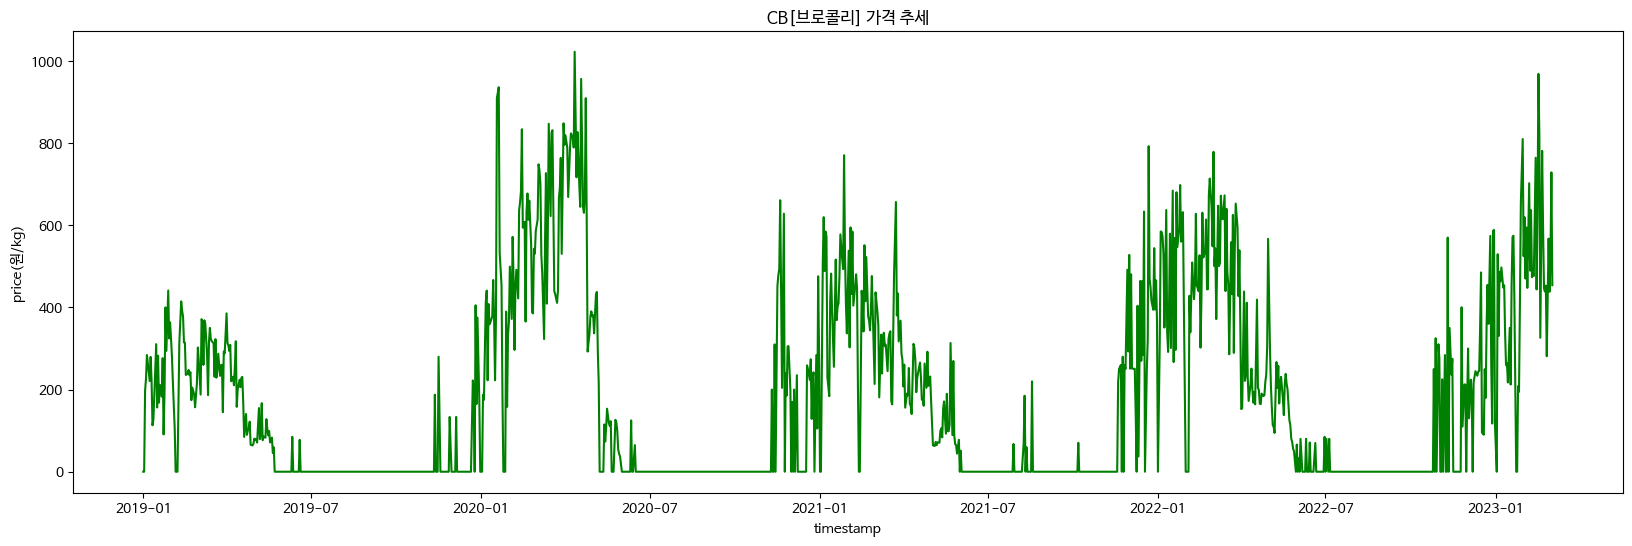

In [ ]:
tmp_4_CB = tmp_4.loc[tmp_4['item'] == 'CB' ]
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4_CB, x='timestamp', y='price(원/kg)', c = 'g')
plt.title('CB[브로콜리] 가격 추세')
plt.show()

# CB도 마찬가지로 일정기간동안 거래가 발생하지 않는듯 하다 (7월 ~ 10월 정도)

## [4-4] CR(무)
- 무는

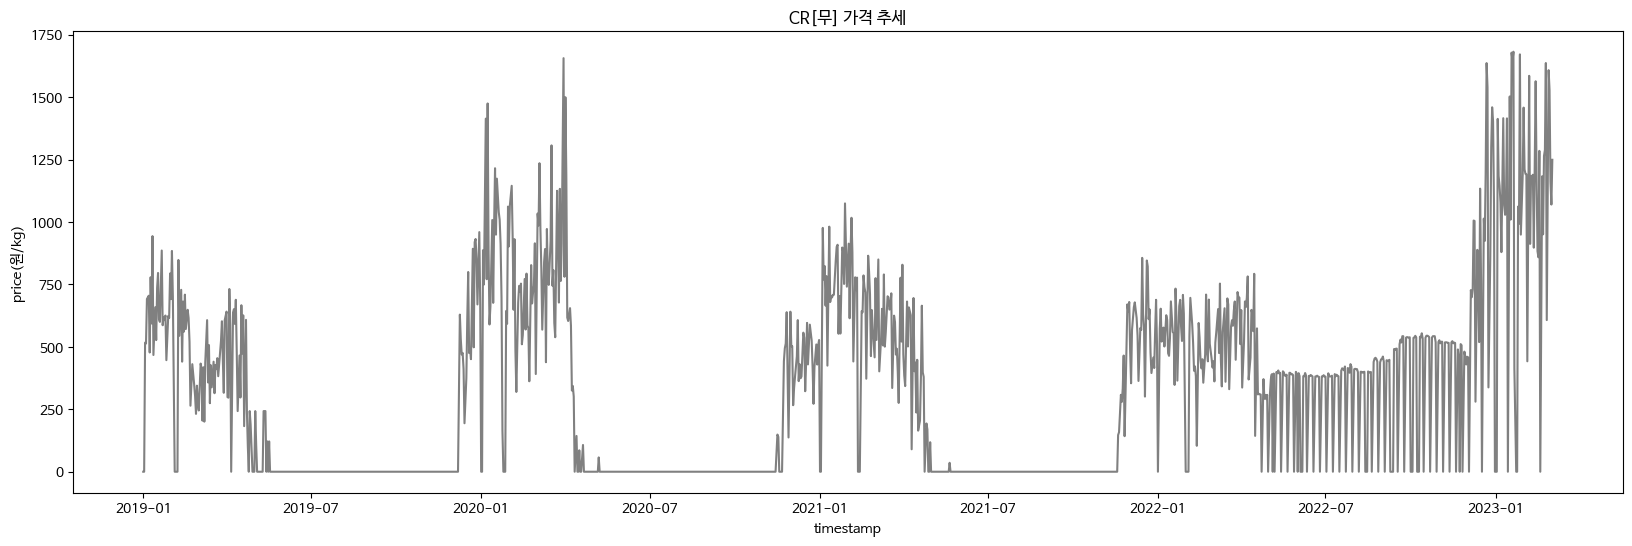

In [ ]:
tmp_4_CR = tmp_4.loc[tmp_4['item'] == 'CR' ]
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4_CR, x='timestamp', y='price(원/kg)', c = 'gray')
plt.title('CR[무] 가격 추세')
plt.show()

# CR도 마찬가지로 일정기간동안 거래가 발생하지 않는듯 하다 (6월 ~ 11월 정도)
# 그런데 22년부터는 거래가 발생하고 있다.

## [4-5] RD (당근)

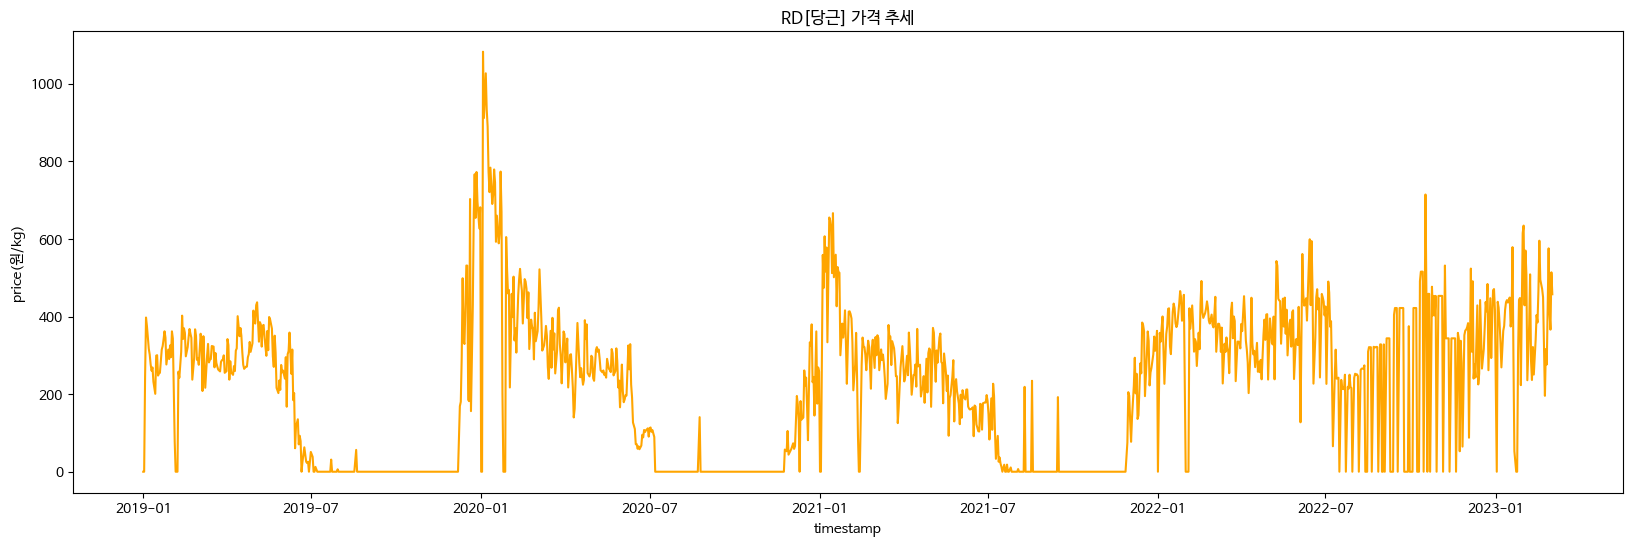

In [ ]:
tmp_4_RD = tmp_4.loc[tmp_4['item'] == 'RD' ]
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4_RD, x='timestamp', y='price(원/kg)', c = 'Orange')
plt.title('RD[당근] 가격 추세')
plt.show()

# RD도 마찬가지로 일정기간동안 거래가 발생하지 않는듯 하다 (6월 ~ 11월 정도)
# 그런데 22년부터는 거래가 발생하고 있다.
# 전체적으로 CR[무]와 유사한 변화가 발생하고 있다.

## [4-6] TG (감귤)

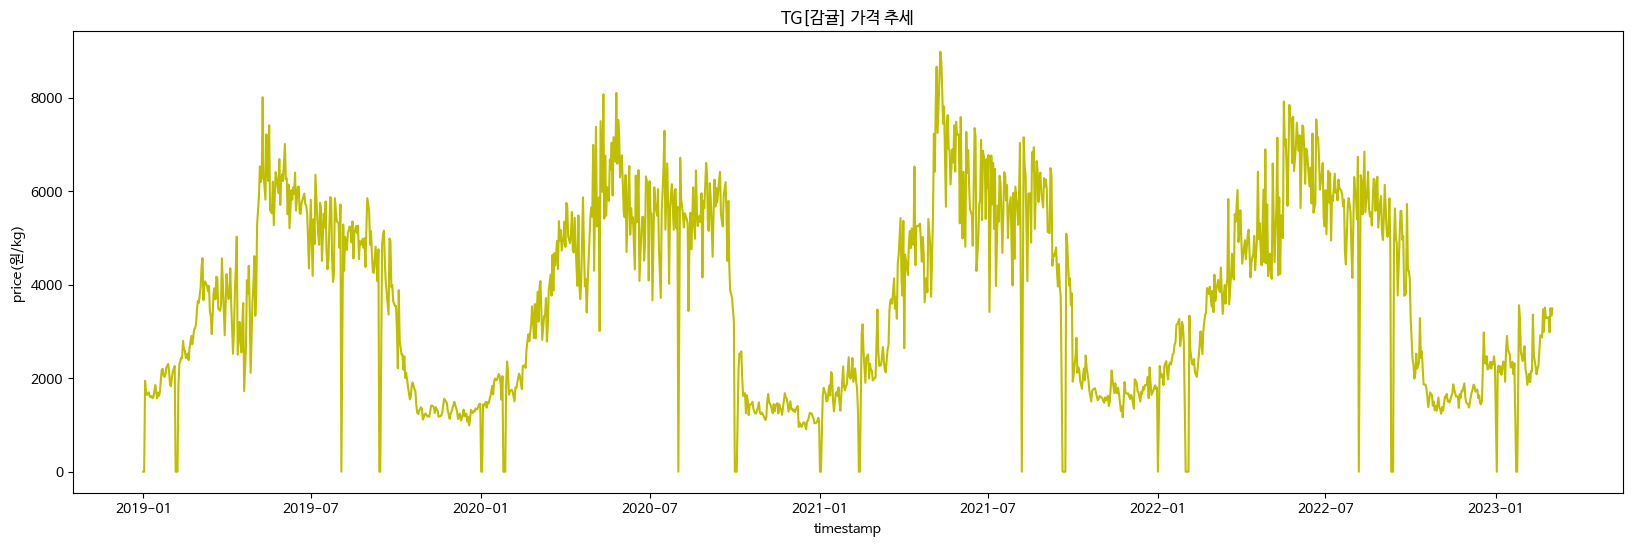

In [ ]:
tmp_4_TG = tmp_4.loc[tmp_4['item'] == 'TG' ]
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_4_TG, x='timestamp', y='price(원/kg)', c = 'y')
plt.title('TG[감귤] 가격 추세')
plt.show()

# TG(귤)은 1년 내내 거래가 발생한다.

# [5] 공급의 추이 확인
- 공급은 test 데이터셋에 존재하지 않기 때문에 학습에 사용은 불가하지만, 추이를 확인해보자

In [ ]:
tmp_5 = data.loc[data['day_of_week'] != 'Sunday' ] # 스무스한 그림을 위해 일요일은 제외하고 그려보자
tmp_5 = tmp_5.groupby(['item','timestamp']).mean().reset_index()[['item', 'timestamp', 'supply(kg)','price(원/kg)']]
tmp_5

<ipython-input-11-a01afe328b48>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_5 = tmp_5.groupby(['item','timestamp']).mean().reset_index()[['item', 'timestamp', 'supply(kg)','price(원/kg)']]


item  timestamp    supply(kg)  price(원/kg)
0      BC 2019-01-01      0.000000     0.000000
1      BC 2019-01-02      0.000000     0.000000
2      BC 2019-01-03   2093.333333  1544.222222
3      BC 2019-01-04   2356.444444  1775.666667
4      BC 2019-01-05   3330.666667  1736.777778
...   ...        ...           ...          ...
6525   TG 2023-02-27  20900.460000  3308.400000
6526   TG 2023-02-28  15272.600000  2982.000000
6527   TG 2023-03-01  15369.670000  3495.400000
6528   TG 2023-03-02  16747.700000  3340.300000
6529   TG 2023-03-03  17462.860000  3492.200000

[6530 rows x 4 columns]

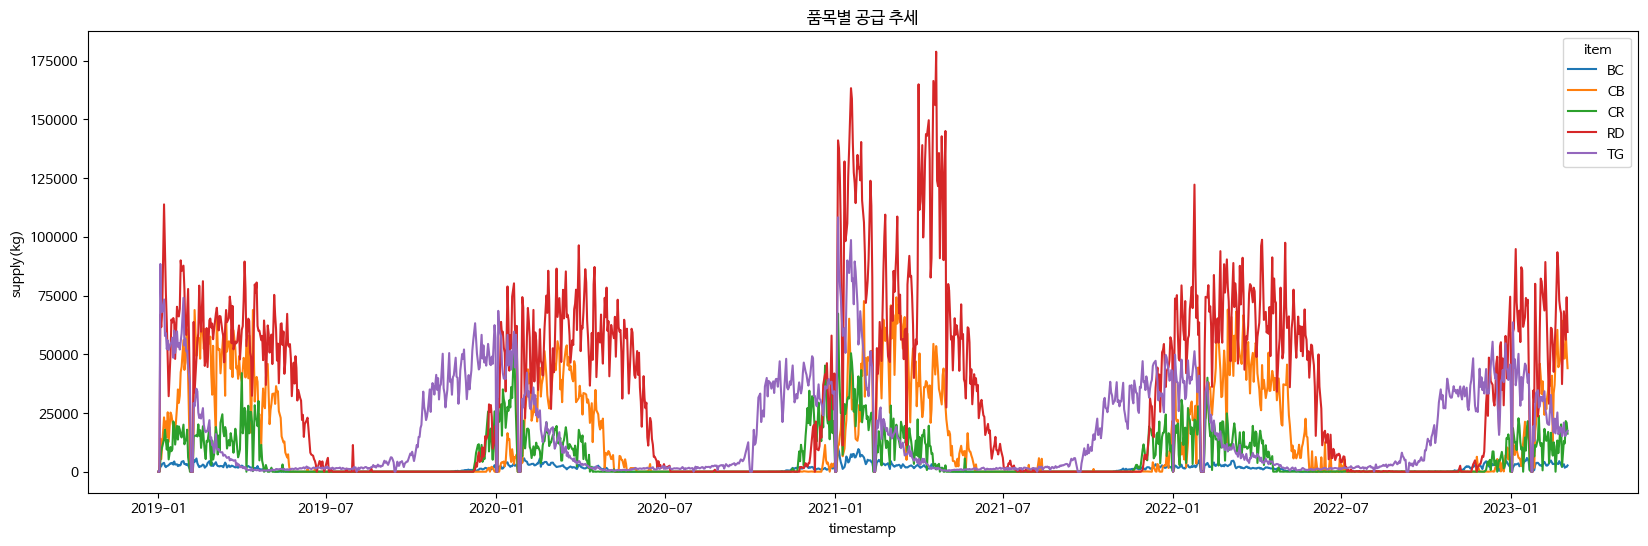

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5, x='timestamp', y='supply(kg)', hue='item')
plt.title('품목별 공급 추세')
plt.show()

# [6] 품목별 가격/공급 곡선의 추이 확인

- 가격이 0일 경우에는 공급도 0인 경우가 많다. -> 공급이 없기에 거래가 존재하지 않는다고 판단할 수 있음.
- 공급이 크게 증가할 경우에는 가격이 하락하고, 공급이 줄어들 때 가격이 증가하는 수요/공급 법칙 또한 확인 가능함

## [6-1] BC (양배추)

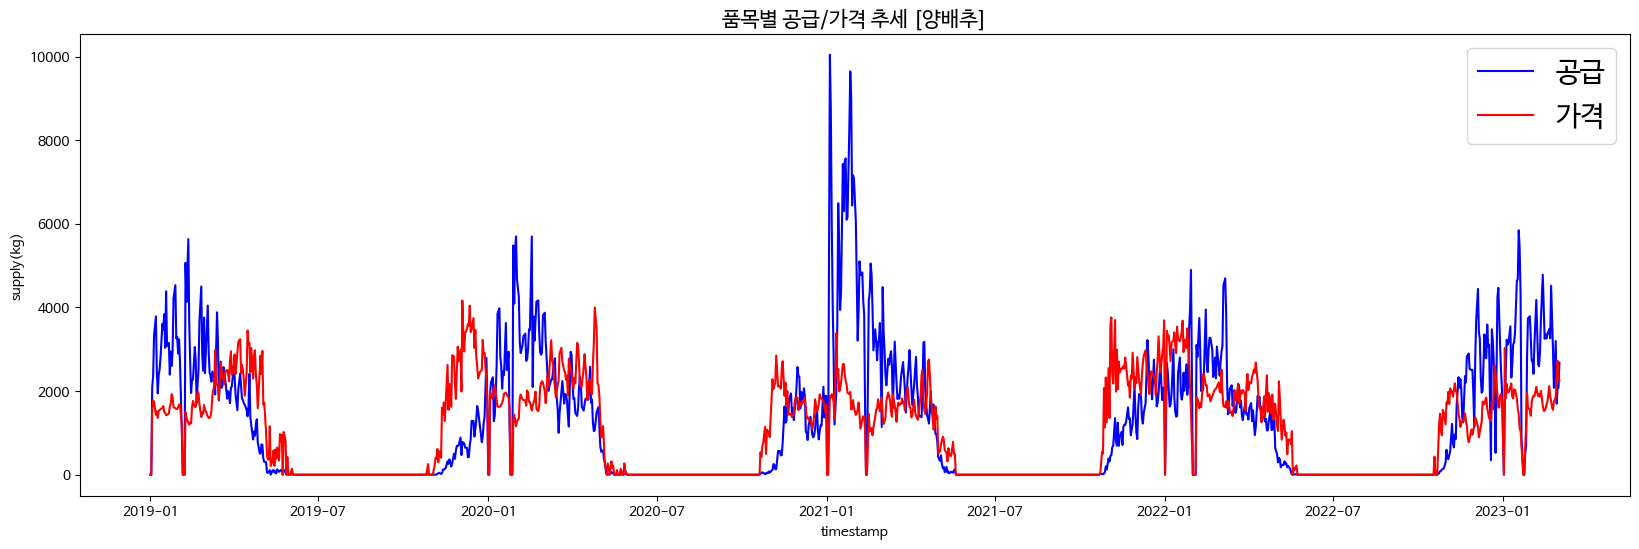

In [ ]:
tmp_5_BC = tmp_5.loc[tmp_5['item'] == 'BC' ]

plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5_BC, x='timestamp', y='supply(kg)', c = 'b', label = '공급') # 공급
sns.lineplot(data=tmp_5_BC, x='timestamp', y='price(원/kg)', c = 'r', label = '가격') # 가격
plt.title('품목별 공급/가격 추세 [양배추]', fontsize = 15)

plt.legend(fontsize=20)

plt.show()

## [6-2] CB (브로콜리)

<ipython-input-32-a4475a640374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_5_CB['supply(kg)'] = tmp_5_CB['supply(kg)'] / 100


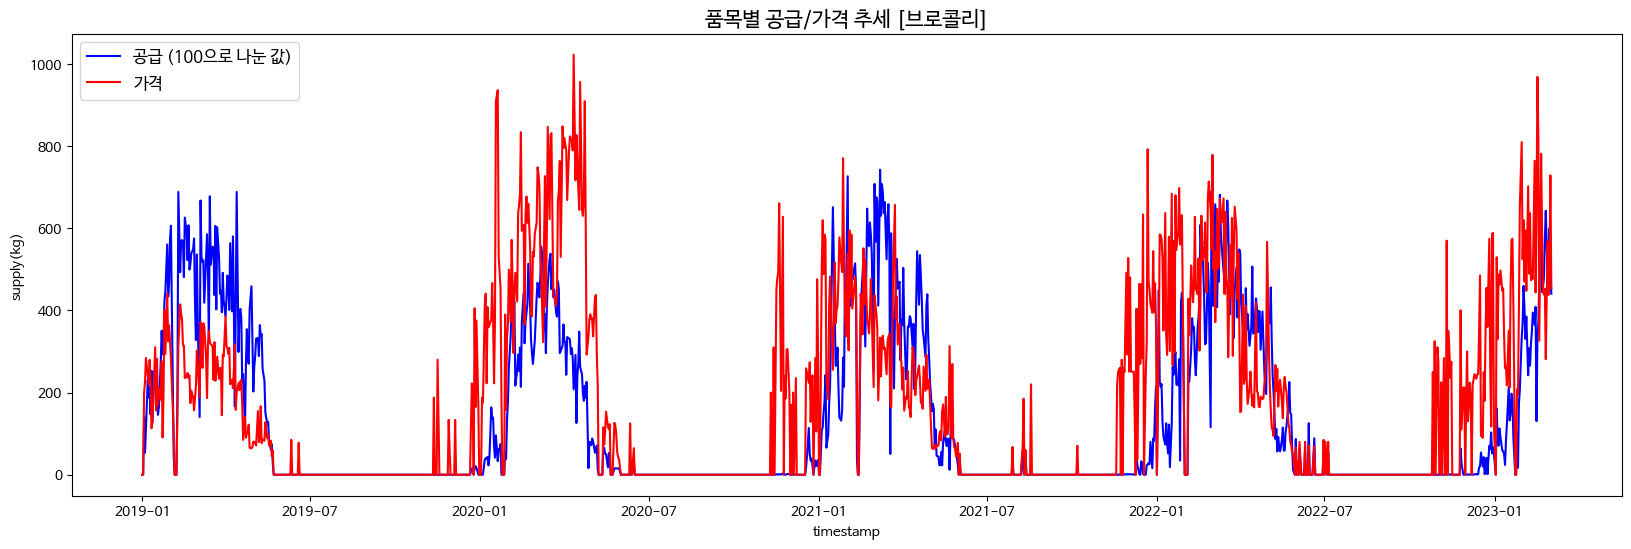

In [ ]:
tmp_5_CB = tmp_5.loc[tmp_5['item'] == 'CB' ]
tmp_5_CB['supply(kg)'] = tmp_5_CB['supply(kg)'] / 100

plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5_CB, x='timestamp', y='supply(kg)', c = 'b', label = '공급 (100으로 나눈 값)') # 공급
sns.lineplot(data=tmp_5_CB, x='timestamp', y='price(원/kg)', c = 'r', label = '가격') # 가격
plt.title('품목별 공급/가격 추세 [브로콜리]', fontsize = 15)

plt.legend(fontsize=12)

plt.show()

## [6-3] CR (무)

- 봄~여름은 원래 거래가 없었으나, 22년도에는 가격이 형성되어있다.
- 공급량은 이전과 크게 다르지 않다. (0에 가까운 공급)
- 전년도에 비축된 양인지 판단이 필요하다.

<ipython-input-36-8b72678e6249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_5_CR['price(원/kg)'] = tmp_5_CR['price(원/kg)'] * 10


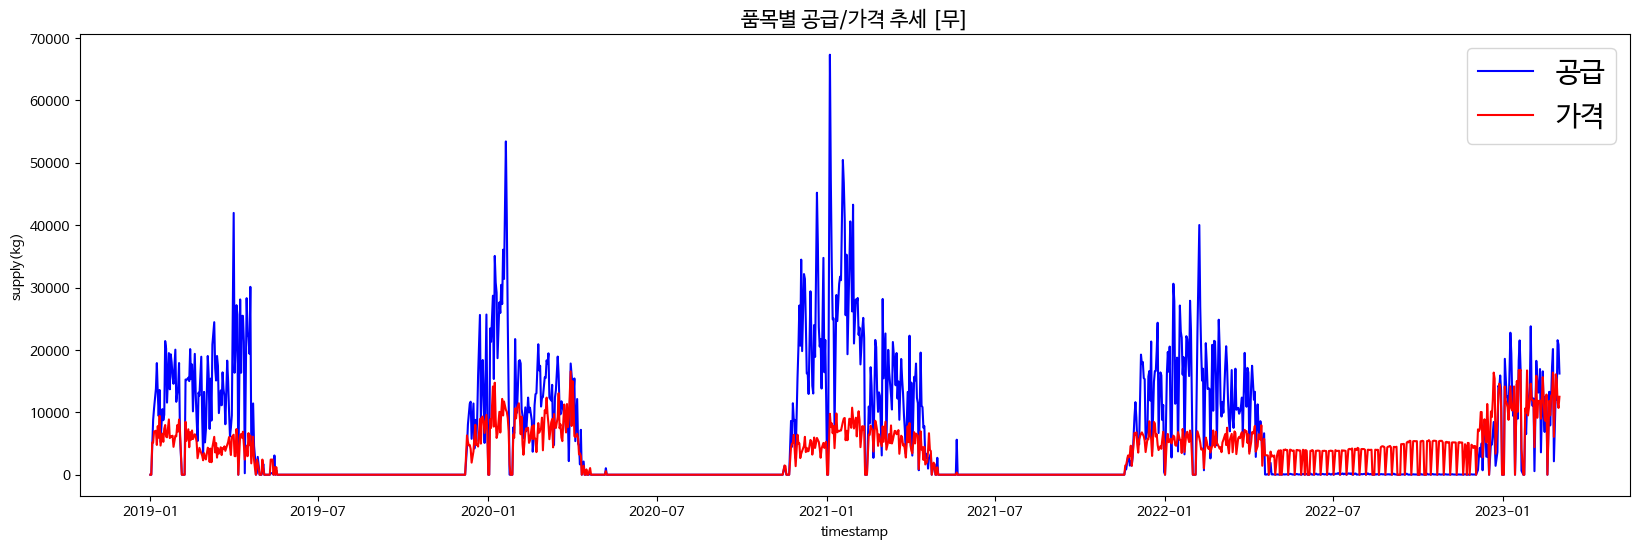

In [ ]:
tmp_5_CR = tmp_5.loc[tmp_5['item'] == 'CR' ]
tmp_5_CR['price(원/kg)'] = tmp_5_CR['price(원/kg)'] * 10


plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5_CR, x='timestamp', y='supply(kg)', c = 'b', label = '공급') # 공급
sns.lineplot(data=tmp_5_CR, x='timestamp', y='price(원/kg)', c = 'r', label = '가격') # 가격
plt.title('품목별 공급/가격 추세 [무]', fontsize = 15)

plt.legend(fontsize=20)

plt.show()

## [6-4] RD (당근)

- 무와 비슷한 양상이다.
- 봄~여름은 원래 거래가 없었으나, 22년도에는 가격이 형성되어있다.
- 공급량은 이전과 크게 다르지 않다. (0에 가까운 공급)
- 전년도에 비축된 양인지 판단이 필요하다.

<ipython-input-38-c79bf26af517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_5_RD['price(원/kg)'] = tmp_5_RD['price(원/kg)'] * 100


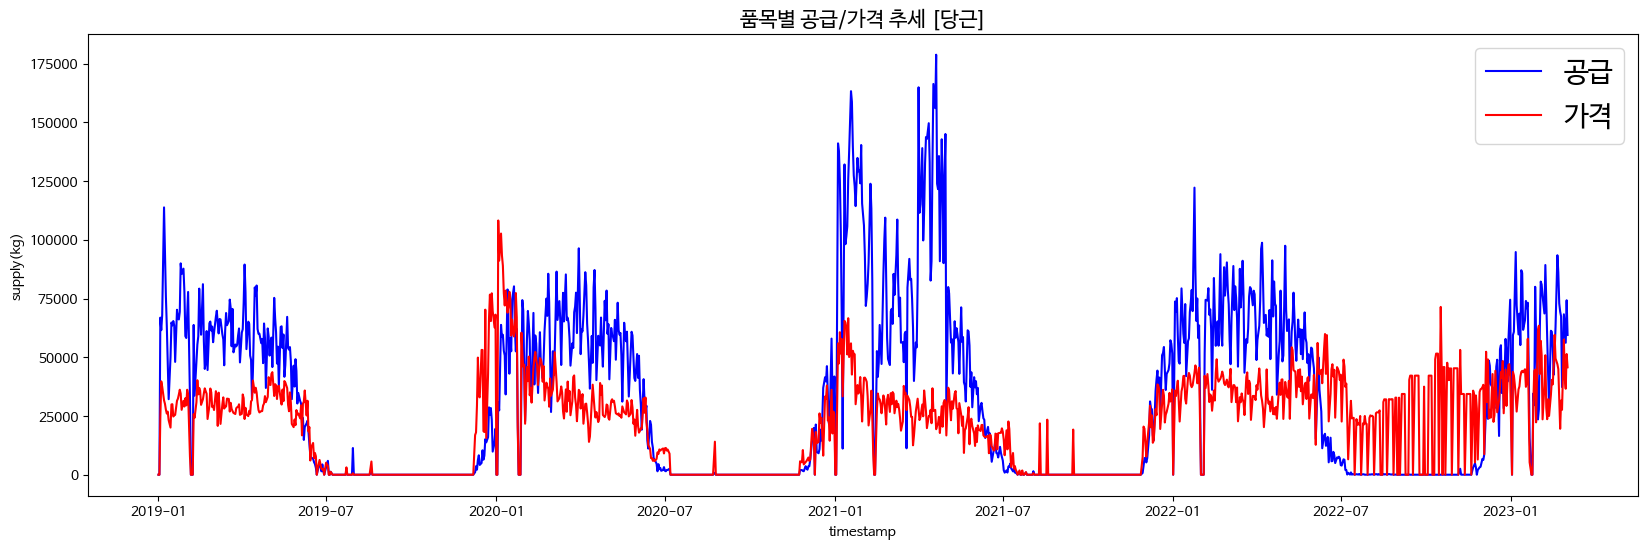

In [ ]:
tmp_5_RD = tmp_5.loc[tmp_5['item'] == 'RD' ]
tmp_5_RD['price(원/kg)'] = tmp_5_RD['price(원/kg)'] * 100


plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5_RD, x='timestamp', y='supply(kg)', c = 'b', label = '공급') # 공급
sns.lineplot(data=tmp_5_RD, x='timestamp', y='price(원/kg)', c = 'r', label = '가격') # 가격
plt.title('품목별 공급/가격 추세 [당근]', fontsize = 15)

plt.legend(fontsize=20)

plt.show()

## [6-5] TG (감귤)
- 감귤은 수요와 공급(가격)의 관계를 가장 명확히 보여준다.

<ipython-input-42-03be41902f1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_5_TG['price(원/kg)'] = tmp_5_TG['price(원/kg)'] * 10


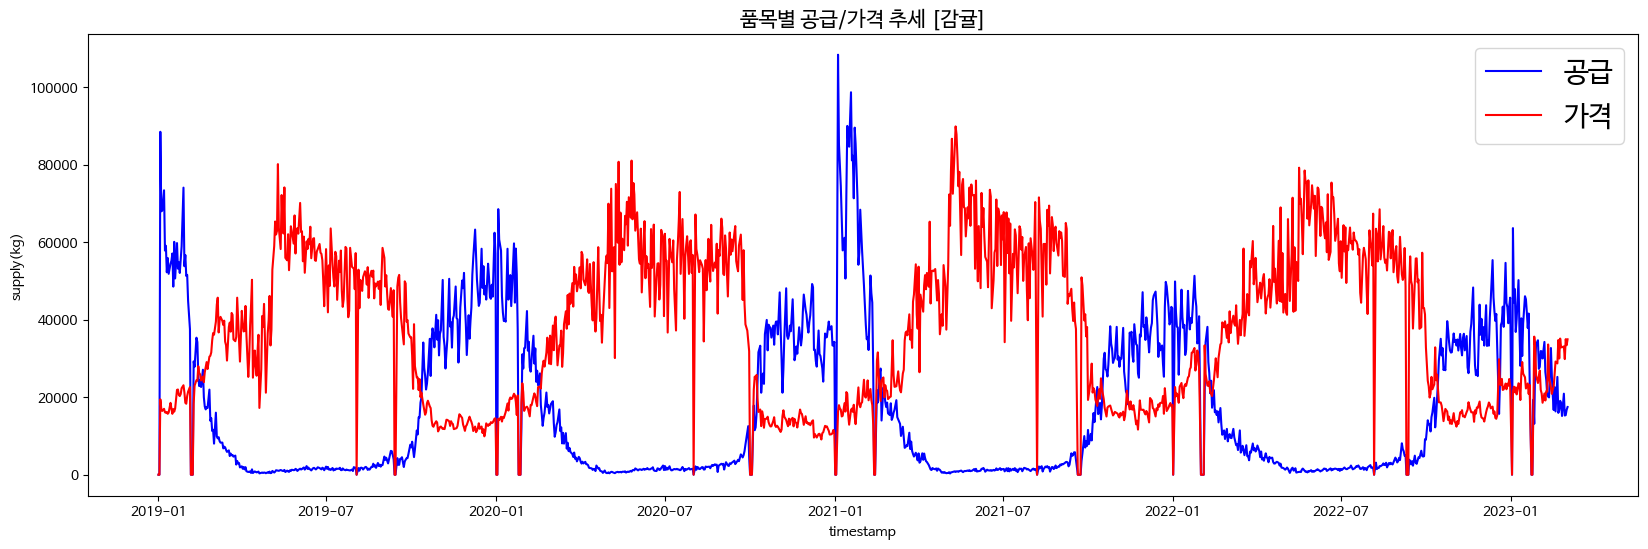

In [ ]:
tmp_5_TG = tmp_5.loc[tmp_5['item'] == 'TG' ]
tmp_5_TG['price(원/kg)'] = tmp_5_TG['price(원/kg)'] * 10


plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_5_TG, x='timestamp', y='supply(kg)', c = 'b', label = '공급') # 공급
sns.lineplot(data=tmp_5_TG, x='timestamp', y='price(원/kg)', c = 'r', label = '가격') # 가격
plt.title('품목별 공급/가격 추세 [감귤]', fontsize = 15)

plt.legend(fontsize=20)

plt.show()

# [7] 가격과 trade 피처들의 상관관계 파악
- 0, NA 처리 방식에 대해 고민 필요

In [ ]:
trade.head(5)

기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지  \
0  2019-01  토마토(신선한 것이나 냉장한 것으로 한정한다)  356571    990        0      0   990   
1  2019-01                         양파  821330    222  4003206   1118  -896   
2  2019-01                         쪽파      60      1    93405    128  -127   
3  2019-01       꽃양배추와 브로콜리(broccoli)     160      1   638913    563  -562   
4  2019-01                  방울다다기 양배추       0      0     7580     38   -38   

   year  month      연월  계절   분기  
0  2019      1  2019-1  겨울  1분기  
1  2019      1  2019-1  겨울  1분기  
2  2019      1  2019-1  겨울  1분기  
3  2019      1  2019-1  겨울  1분기  
4  2019      1  2019-1  겨울  1분기

In [ ]:
trade['연월'] = trade['year'].astype(str) + '-' + trade['month'].astype(str)

a = trade.pivot(index='연월',columns='품목명',values=['수출 중량']).reset_index()
a = a.droplevel(axis=1,level=0)
a.columns = ["수출중량_" + col for col in a.columns]
a = a.rename(columns={"수출중량_": "연월"})

b = trade.pivot(index='연월',columns='품목명',values=['수출 금액']).reset_index()
b = b.droplevel(axis=1,level=0)
b.columns = ["수출금액_" + col for col in b.columns]
b = b.rename(columns={"수출금액_": "연월"})

c = trade.pivot(index='연월',columns='품목명',values=['수입 중량']).reset_index()
c = c.droplevel(axis=1,level=0)
c.columns = ["수입중량_" + col for col in c.columns]
c = c.rename(columns={"수입중량_": "연월"})

d = trade.pivot(index='연월',columns='품목명',values=['수입 금액']).reset_index()
d = d.droplevel(axis=1,level=0)
d.columns = ["수입중량_" + col for col in d.columns]
d = d.rename(columns={"수입중량_": "연월"})

e = trade.pivot(index='연월',columns='품목명',values=['무역수지']).reset_index()
e = e.droplevel(axis=1,level=0)
e.columns = ["무역수지_" + col for col in e.columns]
e = e.rename(columns={"무역수지_": "연월"})

trade_pivot = a.merge(b, how = 'left', on = '연월').merge(c, how = 'left', on = '연월').merge(d, how = 'left', on = '연월').merge(e, how = 'left', on = '연월')
trade_pivot = trade_pivot.fillna(0)
trade_pivot.head()

연월    수출중량_감귤  수출중량_결구(結球) 상추  수출중량_구아바(guava)  \
0   2019-1    58368.0         85200.0              0.0   
1  2019-10     3651.0          3166.0              0.0   
2  2019-11  1663839.0         37307.0              0.0   
3  2019-12   543306.0         62402.0              0.0   
4   2019-2     8474.0         40150.0              0.0   

   수출중량_그레이프프루트(grapefruit)와 포멜로(pomelo)  수출중량_꽃양배추와 브로콜리(broccoli)  수출중량_당근  \
0                                    0.0                      160.0  23150.0   
1                                    0.0                        0.0  17596.0   
2                                    0.0                        0.0  19000.0   
3                                    0.0                        0.0  27000.0   
4                                    0.0                      780.0  16250.0   

   수출중량_대추야자  수출중량_레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]  \
0      876.0                                             1195.0         
1        0.0                                                0.0         
2      909.0                                                0.0         
3        0.0                                               17.0         
4        0.0                                              520.0         

   수출중량_망고(mango)  ...  무역수지_오이류(신선한 것이나 냉장한 것으로 한정한다)  \
0             0.0  ...                            28.0   
1             0.0  ...                            15.0   
2             0.0  ...                            23.0   
3             1.0  ...                            16.0   
4             0.0  ...                             2.0   

   무역수지_완두[피섬 새티범(Pisum sativum)]  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   무역수지_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]  \
0                                               -1.0                                    
1                                               -1.0                                    
2                                               -3.0                                    
3                                               -3.0                                    
4                                               -1.0                                    

   무역수지_자두  무역수지_쪽파  무역수지_참외  무역수지_콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]  \
0      0.0   -127.0      0.0                                    0.0   
1      0.0   -158.0      0.0                                    0.0   
2      0.0   -141.0      0.0                                    0.0   
3      0.0   -155.0      0.0                                    0.0   
4      0.0    -66.0      0.0                                    0.0   

   무역수지_토마토(신선한 것이나 냉장한 것으로 한정한다)  무역수지_파인애플  무역수지_포포(papaw)[파파야(papaya)]  
0                           990.0    -4461.0                       -123.0  
1                          1337.0    -5456.0                        -62.0  
2                          1191.0    -4741.0                        -53.0  
3                          1326.0    -4671.0                        -37.0  
4                           926.0    -3978.0                        -52.0  

[5 rows x 171 columns]

In [ ]:
data_pivot_tmp = data.merge(trade_pivot, how = 'left', on = '연월')
data_pivot_tmp = data_pivot_tmp.fillna(0)
data_pivot_tmp.head(2)

ID  timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102 2019-01-02   TG           A        J         0.0   

   price(원/kg)  year  month  day  ... 무역수지_오이류(신선한 것이나 냉장한 것으로 한정한다)  \
0          0.0  2019      1    1  ...                           28.0   
1          0.0  2019      1    2  ...                           28.0   

   무역수지_완두[피섬 새티범(Pisum sativum)]  \
0                             0.0   
1                             0.0   

  무역수지_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]  \
0                                               -1.0                                   
1                                               -1.0                                   

   무역수지_자두  무역수지_쪽파  무역수지_참외  무역수지_콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]  \
0      0.0   -127.0      0.0                                    0.0   
1      0.0   -127.0      0.0                                    0.0   

   무역수지_토마토(신선한 것이나 냉장한 것으로 한정한다)  무역수지_파인애플  무역수지_포포(papaw)[파파야(papaya)]  
0                           990.0    -4461.0                       -123.0  
1                           990.0    -4461.0                       -123.0  

[2 rows x 183 columns]

In [ ]:
data_pivot_tmp.columns[1]

'timestamp'

In [ ]:
results_plus = []
results_minus = []

for i in range(13, data_pivot_tmp.shape[1]):
    if data_pivot_tmp.columns[i] == 'price(원/kg)':
        continue
    else:
        std_dev = np.std(data_pivot_tmp.iloc[:, i])
        if std_dev == 0:
            continue
        elif np.corrcoef(data_pivot_tmp['price(원/kg)'], data_pivot_tmp.iloc[:, i])[0, 1] > 0.1:
            results_plus.append(data_pivot_tmp.columns[i])
        elif np.corrcoef(data_pivot_tmp['price(원/kg)'], data_pivot_tmp.iloc[:, i])[0, 1] < -0.1:
            results_minus.append(data_pivot_tmp.columns[i])

In [ ]:
results_minus

['수출중량_배', '수출금액_배', '무역수지_배']

# [8] 무역 데이터 추이 확인
- 전체 데이터의 평균이긴 하지만 계절에 따른 추이 변화가 보임


## [8-1] 전체 기간

In [ ]:
tmp_8 = trade.groupby(['기간']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]
tmp_8.head(2)

<ipython-input-14-6e4f45c15587>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_8 = trade.groupby(['기간']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]


기간         수출 중량       수출 금액         수입 중량        수입 금액         무역수지  \
0  2019-01  204860.20000  471.520000  1.208546e+06  1380.880000  -909.400000   
1  2019-02   79259.73913  168.173913  1.133319e+06  1376.695652 -1208.521739   

     year  month  
0  2019.0    1.0  
1  2019.0    2.0

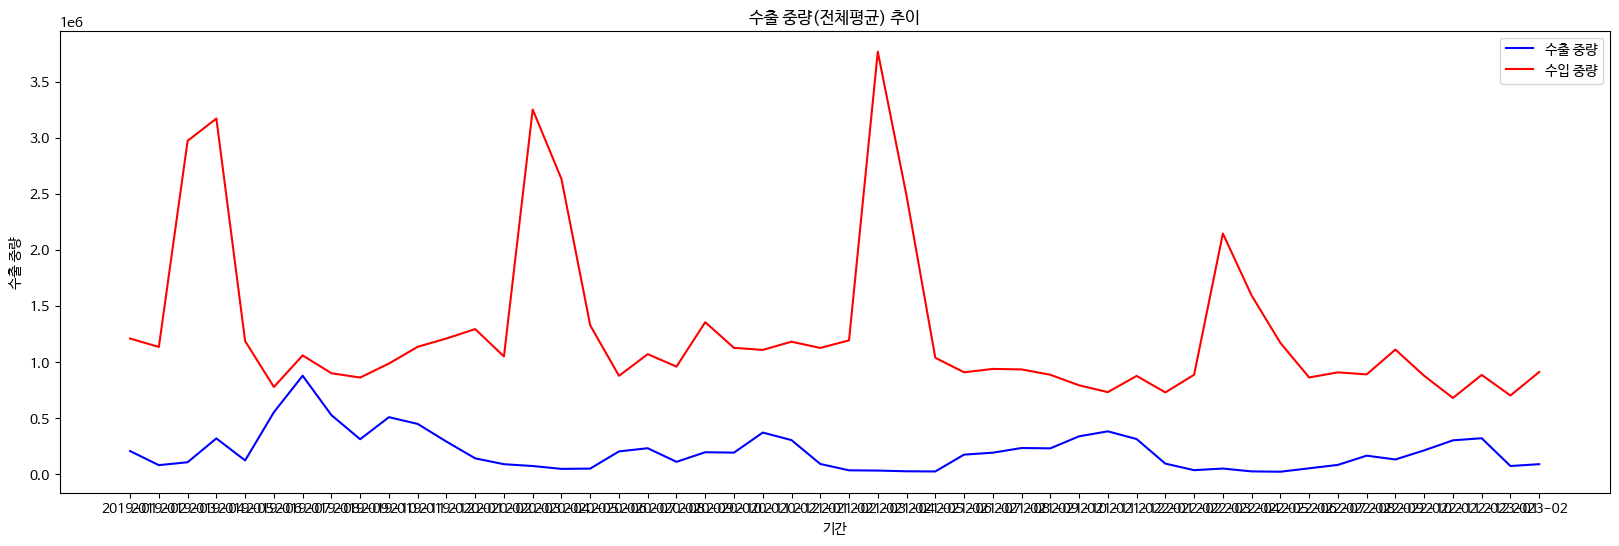

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='기간', y='수출 중량', label = '수출 중량', c = 'b')
sns.lineplot(data=tmp_8, x='기간', y='수입 중량', label = '수입 중량', c = 'r')

plt.title('수출 중량, 수입 중량 추이 비교')
plt.show()

- 매년 봄에 수입 중량이 크게 증가하고 있음
- 수출 중량에서는 큰 특이사항 없음

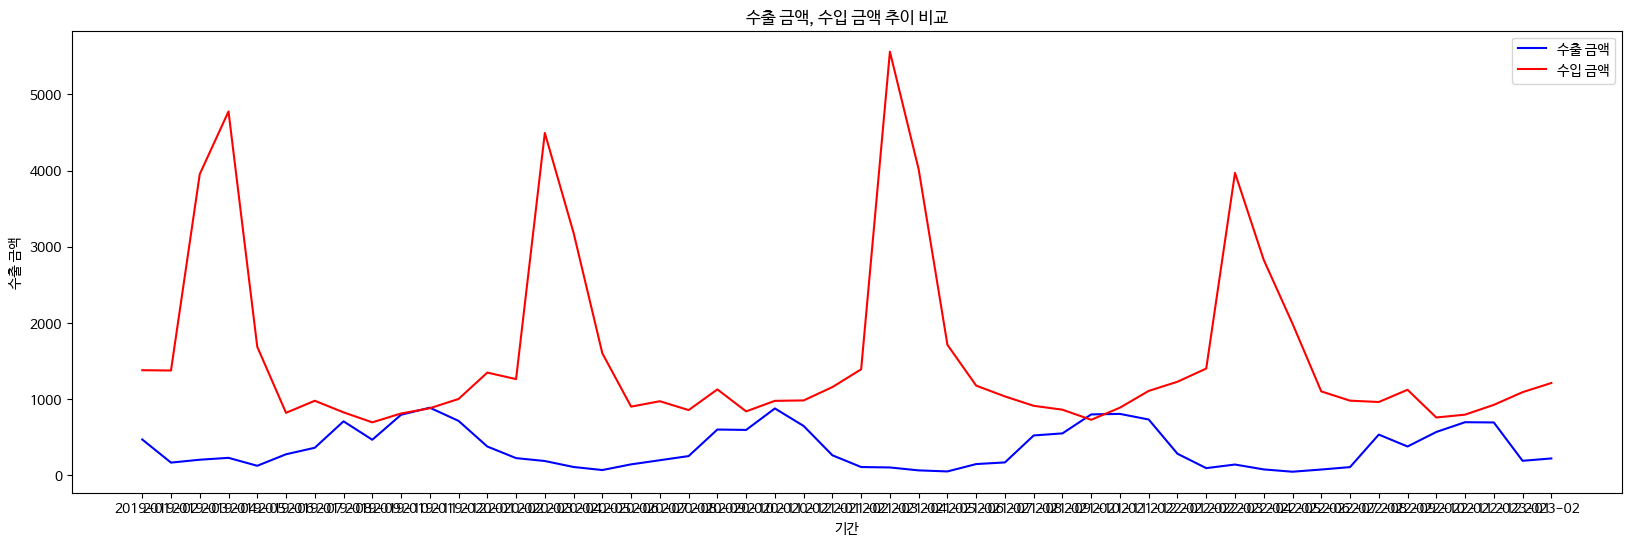

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='기간', y='수출 금액', label = '수출 금액', c = 'b')
sns.lineplot(data=tmp_8, x='기간', y='수입 금액', label = '수입 금액', c = 'r')

plt.title('수출 금액, 수입 금액 추이 비교')
plt.show()

- 매년 봄에 수입 금액이 크게 증가하고 있음
- 수출 금액은 매년 여름에 비교적 높은 모습을 보이고 있음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


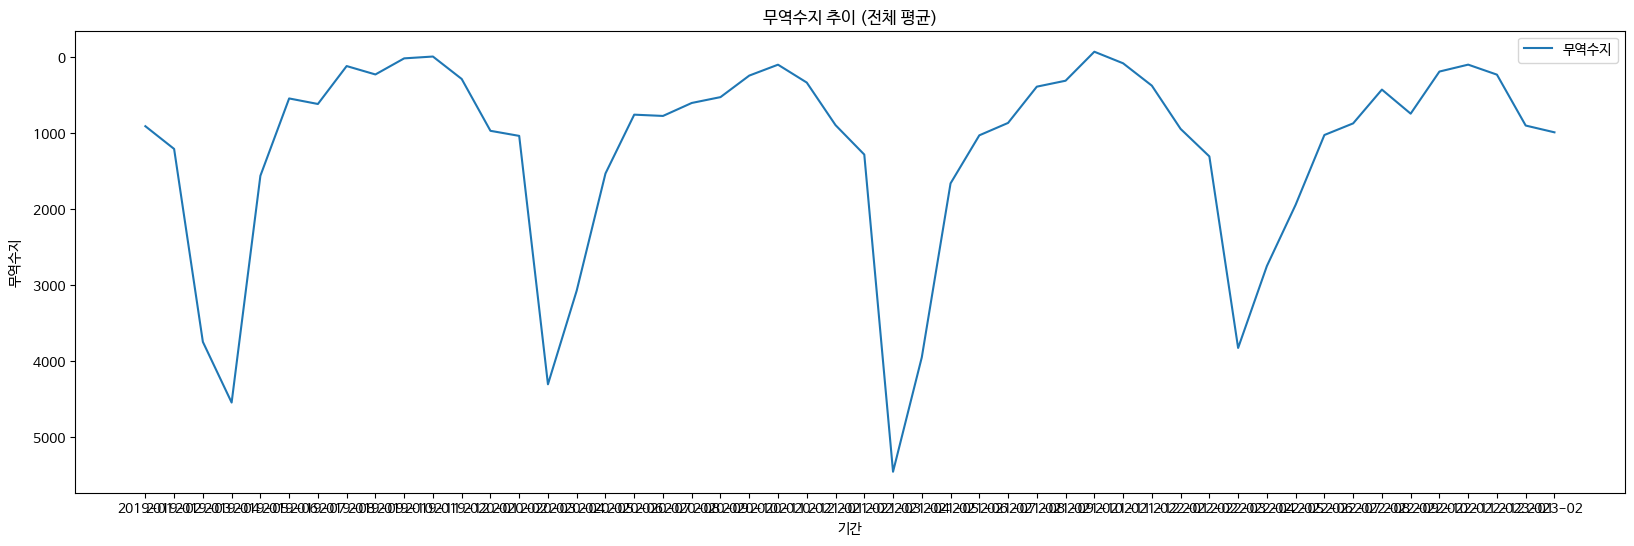

In [ ]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=tmp_8, x='기간', y='무역수지', label = '무역수지')


plt.title('무역수지 추이 (전체 평균)')
plt.show()

- 무역수지는 수입량이 증가할 때 낮아지는 모습을 보이며, 수입이 줄어들 때 증가하는 추세를 보이고 있다.

In [ ]:
trade

기간                              품목명    수출 중량  수출 금액    수입 중량  \
0     2019-01        토마토(신선한 것이나 냉장한 것으로 한정한다)   356571    990        0   
1     2019-01                               양파   821330    222  4003206   
2     2019-01                               쪽파       60      1    93405   
3     2019-01             꽃양배추와 브로콜리(broccoli)      160      1   638913   
4     2019-01                        방울다다기 양배추        0      0     7580   
...       ...                              ...      ...    ...      ...   
1269  2023-02           포포(papaw)[파파야(papaya)]        0      0    23830   
1270  2023-02                               사과   135165    351        0   
1271  2023-02                                배  2206012   5411        1   
1272  2023-02  신 체리[프루너스 체라서스(Prunus cerasus)]        5      0        0   
1273  2023-02                               자두        0      0        2   

      수입 금액  무역수지  year  month      연월  
0         0   990  2019      1  2019-1  
1      1118  -896  2019      1  2019-1  
2       128  -127  2019      1  2019-1  
3       563  -562  2019      1  2019-1  
4        38   -38  2019      1  2019-1  
...     ...   ...   ...    ...     ...  
1269     71   -71  2023      2  2023-2  
1270      0   351  2023      2  2023-2  
1271      0  5411  2023      2  2023-2  
1272      0     0  2023      2  2023-2  
1273      0     0  2023      2  2023-2  

[1274 rows x 10 columns]

## [8-2] 계절

- 계절에 따른 차이가 존재한다.

In [ ]:
tmp_8 = trade.groupby(['계절']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]
tmp_8.head(2)

<ipython-input-34-d129bba85a42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_8 = trade.groupby(['계절']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]


계절          수출 중량       수출 금액         수입 중량        수입 금액        무역수지  \
0  가을  298507.947020  663.778146  9.677725e+05   873.586093 -209.794702   
1  겨울  151142.599432  367.625000  1.020475e+06  1206.687500 -839.048295   

          year     month  
0  2020.500000  9.970199  
1  2020.909091  4.426136

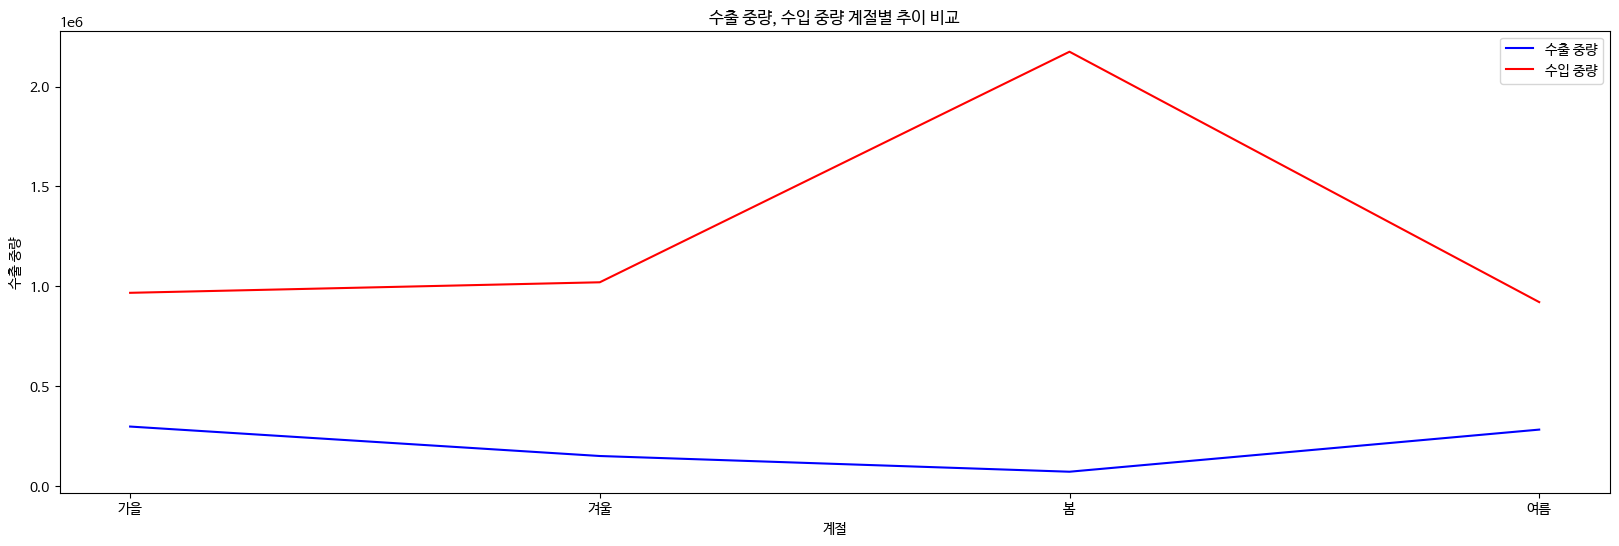

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='계절', y='수출 중량', label = '수출 중량', c = 'b')
sns.lineplot(data=tmp_8, x='계절', y='수입 중량', label = '수입 중량', c = 'r')

plt.title('수출 중량, 수입 중량 계절별 추이 비교')
plt.show()

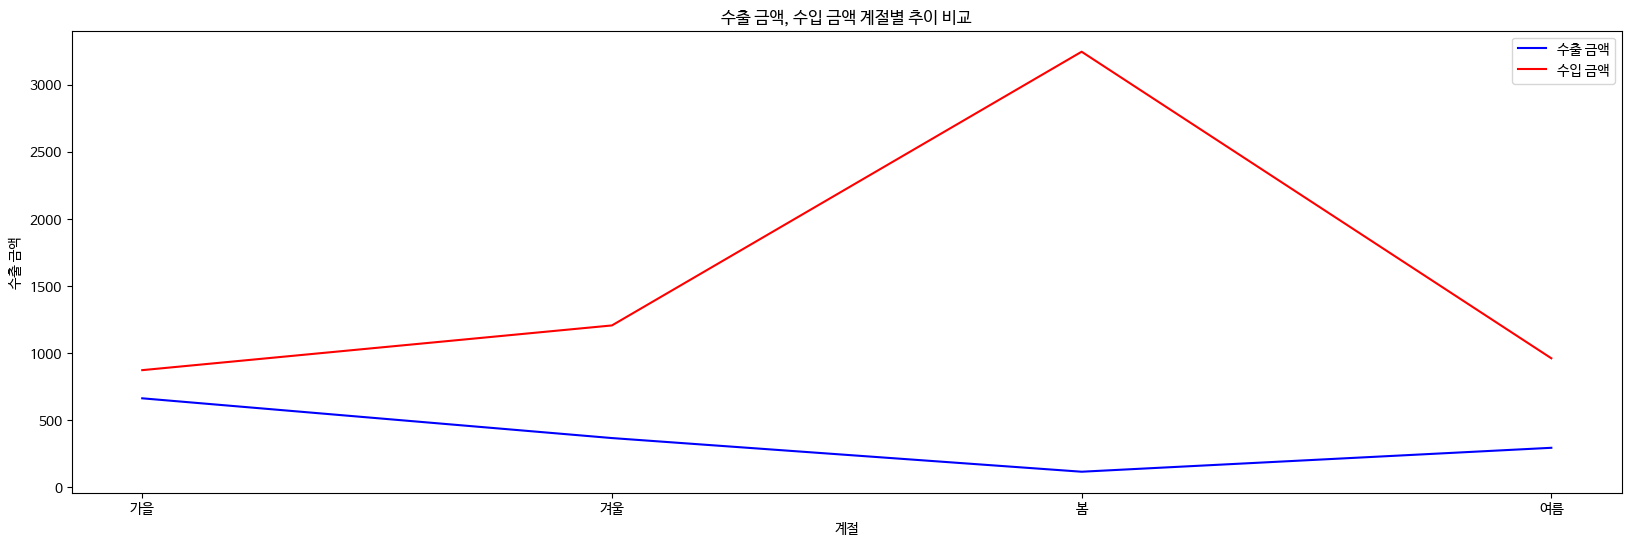

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='계절', y='수출 금액', label = '수출 금액', c = 'b')
sns.lineplot(data=tmp_8, x='계절', y='수입 금액', label = '수입 금액', c = 'r')

plt.title('수출 금액, 수입 금액 계절별 추이 비교')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


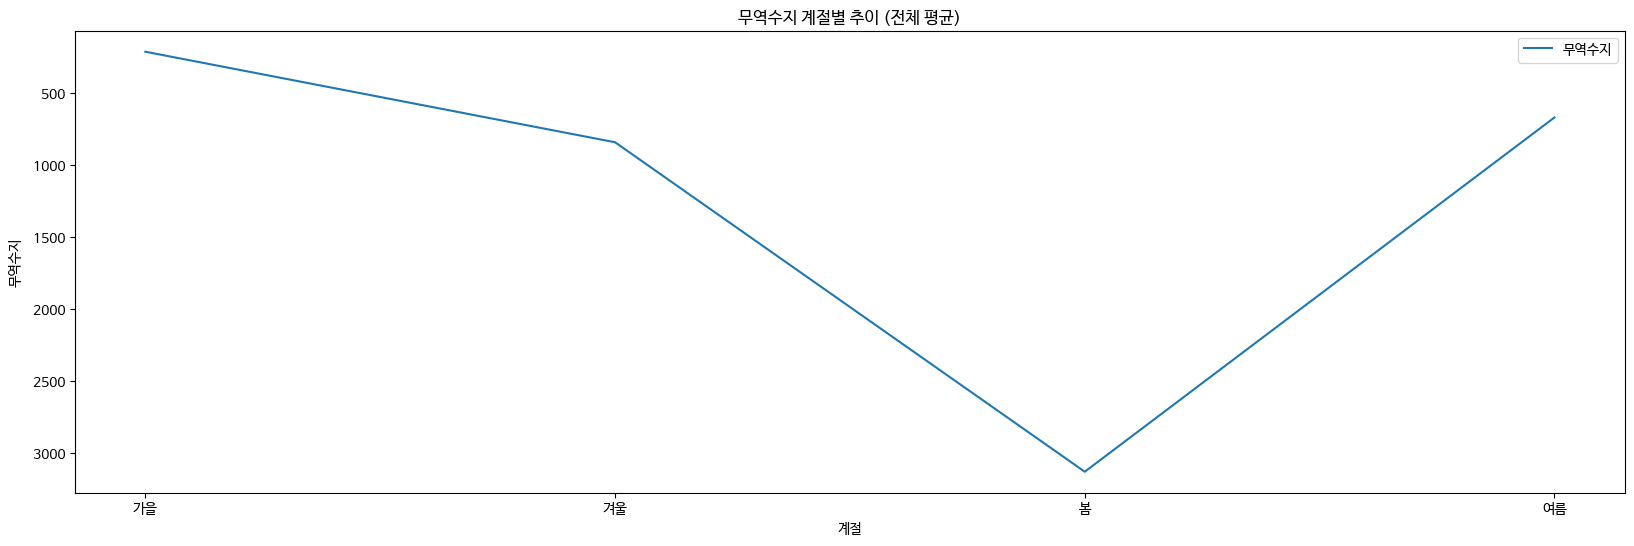

In [ ]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=tmp_8, x='계절', y='무역수지', label = '무역수지')


plt.title('무역수지 계절별 추이 (전체 평균)')
plt.show()

## [8-3] 분기
- 분기별 차이 또한 존재한다.

In [ ]:
tmp_8 = trade.groupby(['분기']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]
tmp_8.head(2)

<ipython-input-38-13d2f4905b76>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_8 = trade.groupby(['분기']).mean().reset_index() #[['item', 'timestamp', 'supply(kg)','price(원/kg)']]


분기          수출 중량       수출 금액         수입 중량        수입 금액         무역수지  \
0  1분기   84062.154286  218.180000  1.563344e+06  2159.988571 -1941.771429   
1  2분기  133691.423077  118.689103  1.462481e+06  2096.935897 -1978.259615   

          year     month  
0  2020.917143  1.914286  
1  2020.522436  5.032051

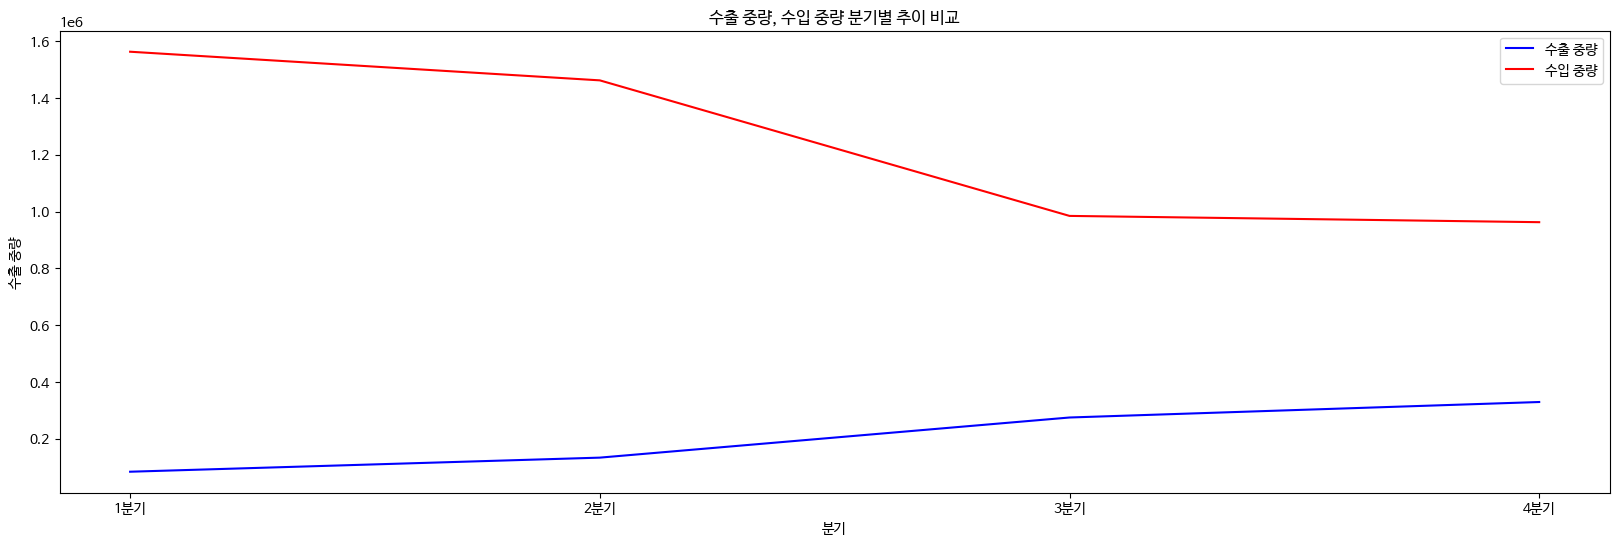

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='분기', y='수출 중량', label = '수출 중량', c = 'b')
sns.lineplot(data=tmp_8, x='분기', y='수입 중량', label = '수입 중량', c = 'r')

plt.title('수출 중량, 수입 중량 분기별 추이 비교')
plt.show()

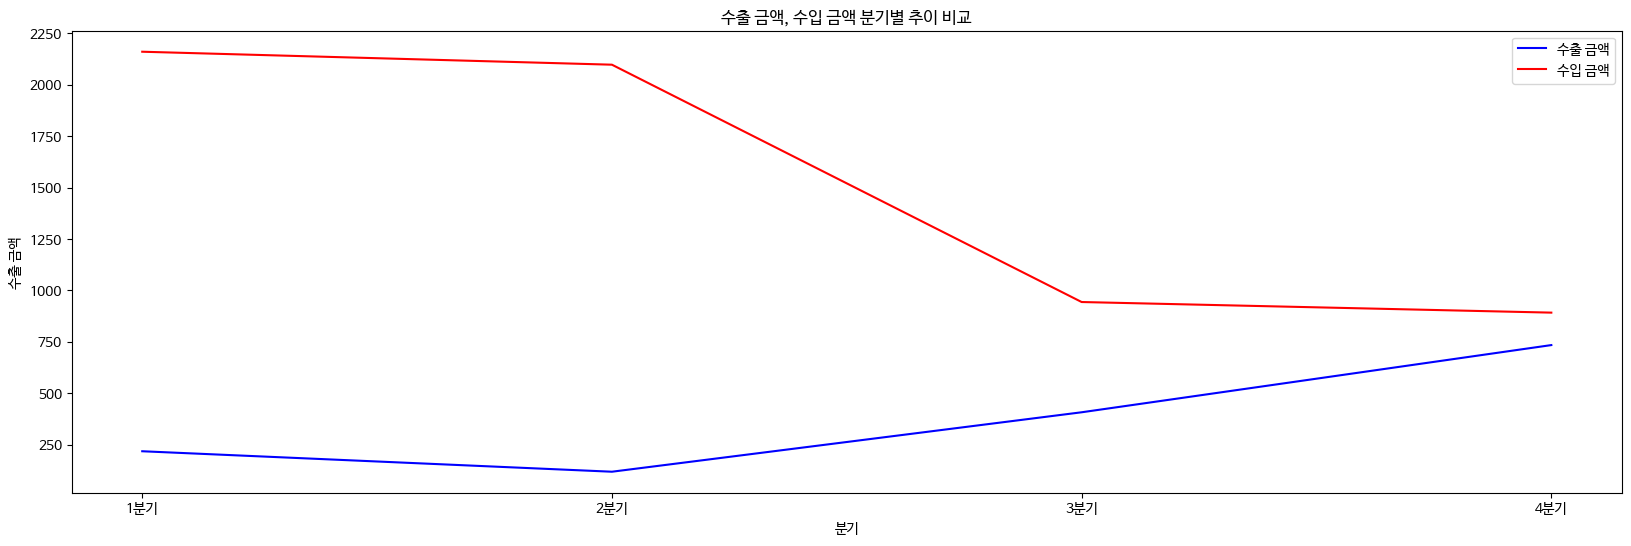

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=tmp_8, x='분기', y='수출 금액', label = '수출 금액', c = 'b')
sns.lineplot(data=tmp_8, x='분기', y='수입 금액', label = '수입 금액', c = 'r')

plt.title('수출 금액, 수입 금액 분기별 추이 비교')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


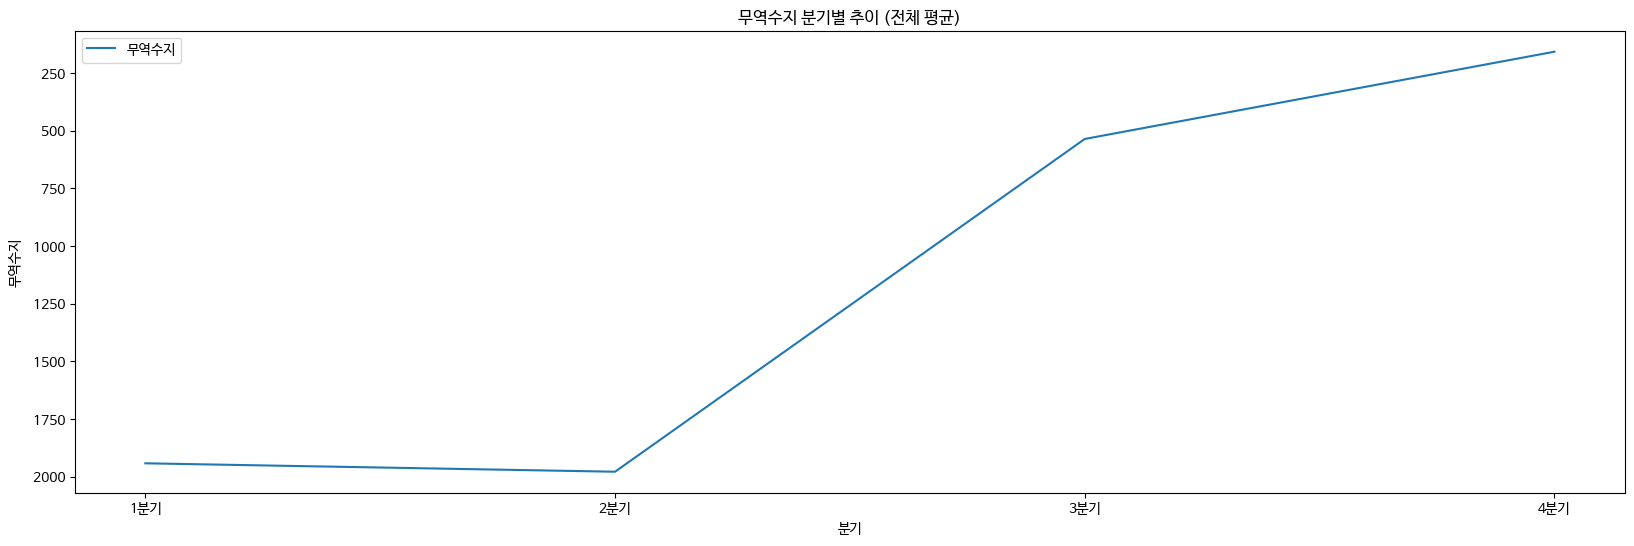

In [ ]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=tmp_8, x='분기', y='무역수지', label = '무역수지')


plt.title('무역수지 분기별 추이 (전체 평균)')
plt.show()

# [9] item별 연월별 평균 가격 VS trade 데이터 ==> 상관관계 분석

- 주요 피처 파악 목적

In [ ]:
tmp_9 = data.groupby(['item','연월']).mean().reset_index()[['item','연월','price(원/kg)']]

<ipython-input-154-f6f62d526467>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_9 = data.groupby(['item','연월']).mean().reset_index()[['item','연월','price(원/kg)']]


In [ ]:
trade['연월'] = trade['year'].astype(str) + '-' + trade['month'].astype(str)

a = trade.pivot(index='연월',columns='품목명',values=['수출 중량']).reset_index()
a = a.droplevel(axis=1,level=0)
a.columns = ["수출중량_" + col for col in a.columns]
a = a.rename(columns={"수출중량_": "연월"})

b = trade.pivot(index='연월',columns='품목명',values=['수출 금액']).reset_index()
b = b.droplevel(axis=1,level=0)
b.columns = ["수출금액_" + col for col in b.columns]
b = b.rename(columns={"수출금액_": "연월"})

c = trade.pivot(index='연월',columns='품목명',values=['수입 중량']).reset_index()
c = c.droplevel(axis=1,level=0)
c.columns = ["수입중량_" + col for col in c.columns]
c = c.rename(columns={"수입중량_": "연월"})

d = trade.pivot(index='연월',columns='품목명',values=['수입 금액']).reset_index()
d = d.droplevel(axis=1,level=0)
d.columns = ["수입금액_" + col for col in d.columns]
d = d.rename(columns={"수입금액_": "연월"})

e = trade.pivot(index='연월',columns='품목명',values=['무역수지']).reset_index()
e = e.droplevel(axis=1,level=0)
e.columns = ["무역수지_" + col for col in e.columns]
e = e.rename(columns={"무역수지_": "연월"})

trade_pivot = a.merge(b, how = 'left', on = '연월').merge(c, how = 'left', on = '연월').merge(d, how = 'left', on = '연월').merge(e, how = 'left', on = '연월')
trade_pivot = trade_pivot.fillna(0)
trade_pivot.head()

연월    수출중량_감귤  수출중량_결구(結球) 상추  수출중량_구아바(guava)  \
0   2019-1    58368.0         85200.0              0.0   
1  2019-10     3651.0          3166.0              0.0   
2  2019-11  1663839.0         37307.0              0.0   
3  2019-12   543306.0         62402.0              0.0   
4   2019-2     8474.0         40150.0              0.0   

   수출중량_그레이프프루트(grapefruit)와 포멜로(pomelo)  수출중량_꽃양배추와 브로콜리(broccoli)  수출중량_당근  \
0                                    0.0                      160.0  23150.0   
1                                    0.0                        0.0  17596.0   
2                                    0.0                        0.0  19000.0   
3                                    0.0                        0.0  27000.0   
4                                    0.0                      780.0  16250.0   

   수출중량_대추야자  수출중량_레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]  \
0      876.0                                             1195.0         
1        0.0                                                0.0         
2      909.0                                                0.0         
3        0.0                                               17.0         
4        0.0                                              520.0         

   수출중량_망고(mango)  ...  무역수지_오이류(신선한 것이나 냉장한 것으로 한정한다)  \
0             0.0  ...                            28.0   
1             0.0  ...                            15.0   
2             0.0  ...                            23.0   
3             1.0  ...                            16.0   
4             0.0  ...                             2.0   

   무역수지_완두[피섬 새티범(Pisum sativum)]  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   무역수지_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]  \
0                                               -1.0                                    
1                                               -1.0                                    
2                                               -3.0                                    
3                                               -3.0                                    
4                                               -1.0                                    

   무역수지_자두  무역수지_쪽파  무역수지_참외  무역수지_콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]  \
0      0.0   -127.0      0.0                                    0.0   
1      0.0   -158.0      0.0                                    0.0   
2      0.0   -141.0      0.0                                    0.0   
3      0.0   -155.0      0.0                                    0.0   
4      0.0    -66.0      0.0                                    0.0   

   무역수지_토마토(신선한 것이나 냉장한 것으로 한정한다)  무역수지_파인애플  무역수지_포포(papaw)[파파야(papaya)]  
0                           990.0    -4461.0                       -123.0  
1                          1337.0    -5456.0                        -62.0  
2                          1191.0    -4741.0                        -53.0  
3                          1326.0    -4671.0                        -37.0  
4                           926.0    -3978.0                        -52.0  

[5 rows x 171 columns]

## [+] 특정 범위를 넘어가는 상관계수 추출, 히트맵 시각화 함수

In [ ]:
def find_high_corr(item, scope) :
    tmp_item_data = tmp_9.loc[tmp_9['item'] == item].merge(trade_pivot, on = '연월', how = 'left').fillna(0)
    corr_item = tmp_item_data.iloc[:,2:].corr()
    high_corr = corr_item[corr_item['price(원/kg)'] > scope].index
    #low_corr = corr_item[abs(corr_item['price(원/kg)']) < -scope].index
    high_corr = high_corr.drop(['price(원/kg)'])
    return high_corr

def find_low_corr(item, scope) :
    tmp_item_data_low = tmp_9.loc[tmp_9['item'] == item].merge(trade_pivot, on = '연월', how = 'left').fillna(0)
    corr_item = tmp_item_data_low.iloc[:,2:].corr()
    low_corr = corr_item[corr_item['price(원/kg)'] < scope].index
    #low_corr = corr_item[abs(corr_item['price(원/kg)']) < scope].index
    #low_corr = low_corr.drop(['price(원/kg)'])
    return low_corr

def find_plotting_high_corr(item, scope) :
    tmp_item_data = tmp_9.loc[tmp_9['item'] == item].merge(trade_pivot, on = '연월', how = 'left').fillna(0)
    corr_item = tmp_item_data.iloc[:,2:].corr()
    high_corr = corr_item[corr_item['price(원/kg)'] > scope].index

    high_corr_matrix = tmp_item_data[high_corr].corr()
    #low_corr = corr_item[abs(corr_item['price(원/kg)']) < -scope].index
    plt.figure(figsize=(16, 10))

    sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm')

    return plt.show()

def find_plotting_low_corr(item, scope) :
    tmp_item_data = tmp_9.loc[tmp_9['item'] == item].merge(trade_pivot, on = '연월', how = 'left').fillna(0)
    corr_item = tmp_item_data.iloc[:,2:].corr()
    low_corr = corr_item[corr_item['price(원/kg)'] < scope].index

    low_corr_matrix = tmp_item_data[low_corr].corr()
    #low_corr = corr_item[abs(corr_item['price(원/kg)']) < -scope].index
    plt.figure(figsize=(16, 10))

    sns.heatmap(low_corr_matrix, annot=True, cmap='coolwarm')

    return plt.show()

In [ ]:
BC_high_corr = find_high_corr('BC', 0.4)
TG_high_corr = find_high_corr('TG', 0.4)
CR_high_corr = find_high_corr('CR', 0.4)
CB_high_corr = find_high_corr('CB', 0.4)
RD_high_corr = find_high_corr('RD', 0.4)

BC_low_corr = find_low_corr('BC', -0.4)
TG_low_corr = find_low_corr('TG', -0.4)
CR_low_corr = find_low_corr('CR', -0.4)
CB_low_corr = find_low_corr('CB', -0.4)
RD_low_corr = find_low_corr('RD', -0.4)

##[9-1] BC 양배추 연월평균가격 vs pivot trade data
- 상관관계 0.4 초과 :
- 상관관계 -0.4 미만 :

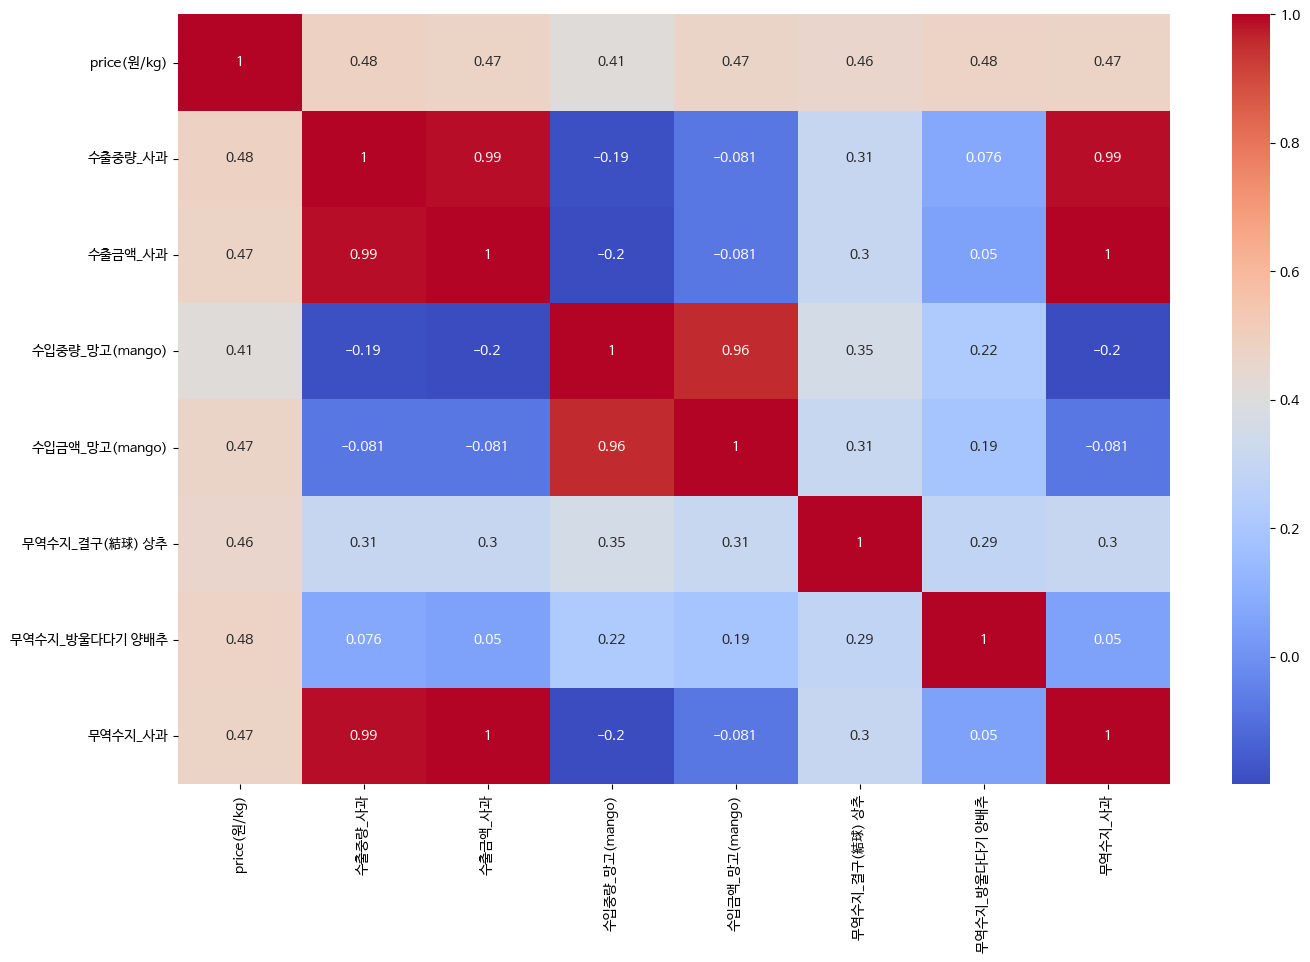

Index(['수출중량_사과', '수출금액_사과', '수입중량_망고(mango)', '수입금액_망고(mango)',
       '무역수지_결구(結球) 상추', '무역수지_방울다다기 양배추', '무역수지_사과'],
      dtype='object')


In [ ]:
find_plotting_high_corr('BC', 0.4)
print(BC_high_corr)

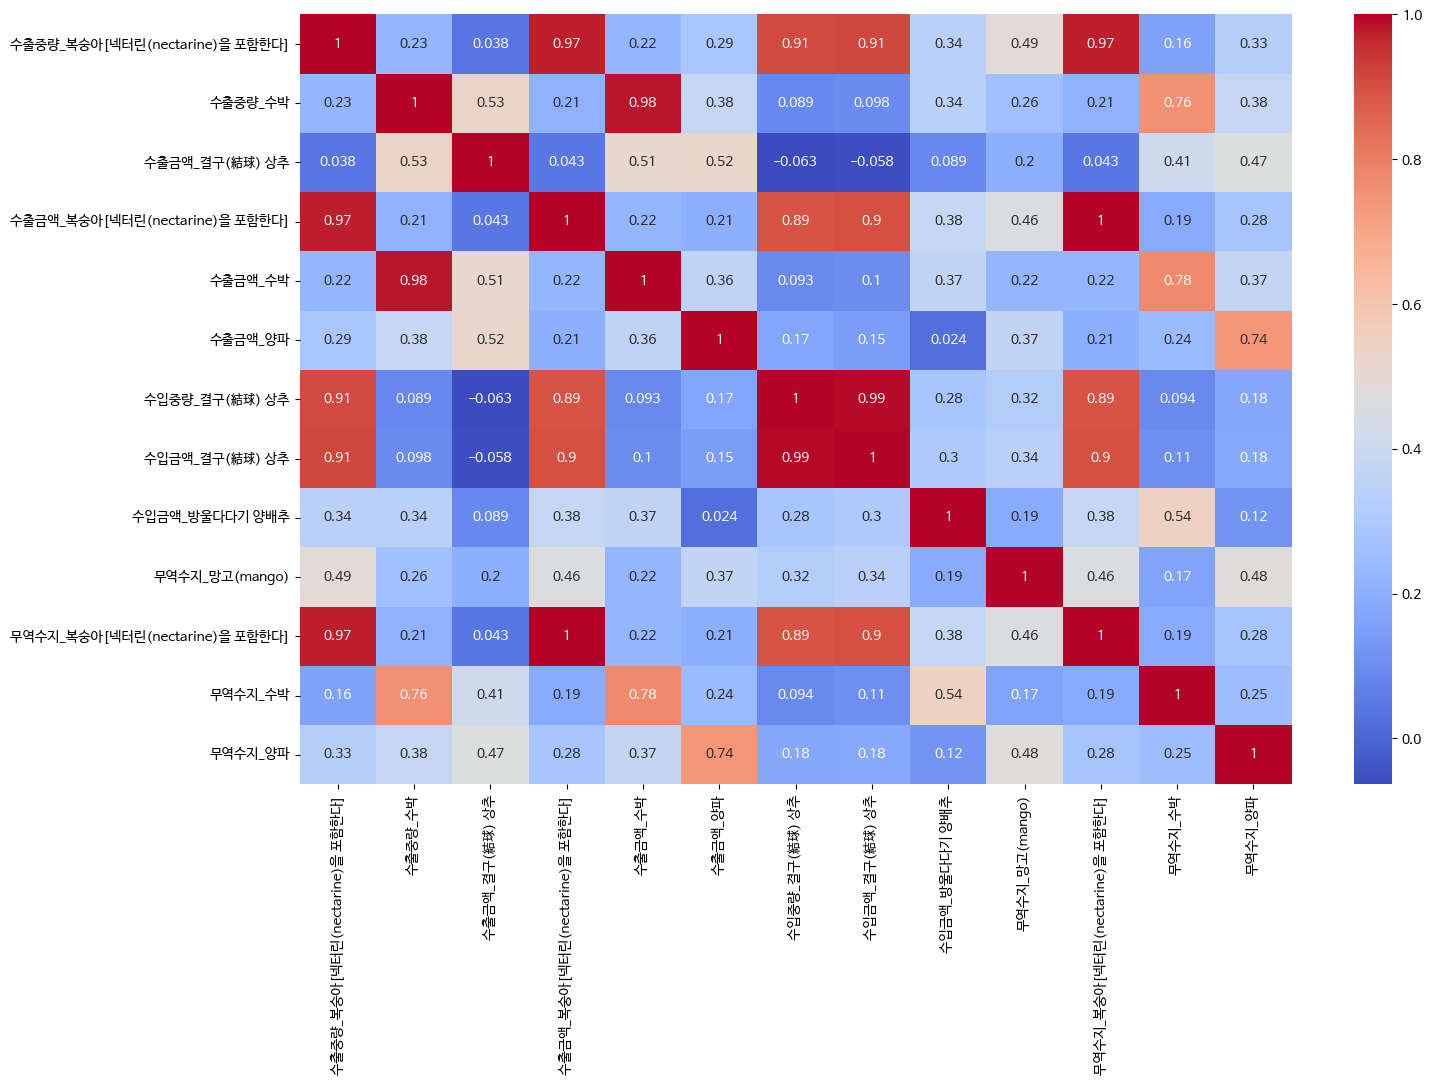

Index(['수출중량_복숭아[넥터린(nectarine)을 포함한다]', '수출중량_수박', '수출금액_결구(結球) 상추',
       '수출금액_복숭아[넥터린(nectarine)을 포함한다]', '수출금액_수박', '수출금액_양파',
       '수입중량_결구(結球) 상추', '수입금액_결구(結球) 상추', '수입금액_방울다다기 양배추', '무역수지_망고(mango)',
       '무역수지_복숭아[넥터린(nectarine)을 포함한다]', '무역수지_수박', '무역수지_양파'],
      dtype='object')


In [ ]:
find_plotting_low_corr('BC', -0.4)
print(BC_low_corr)

##[9-2] TG 감귤 연월평균가격 vs pivot trade data
- 상관관계 0.4 초과 :
- 상관관계 -0.4 미만 :

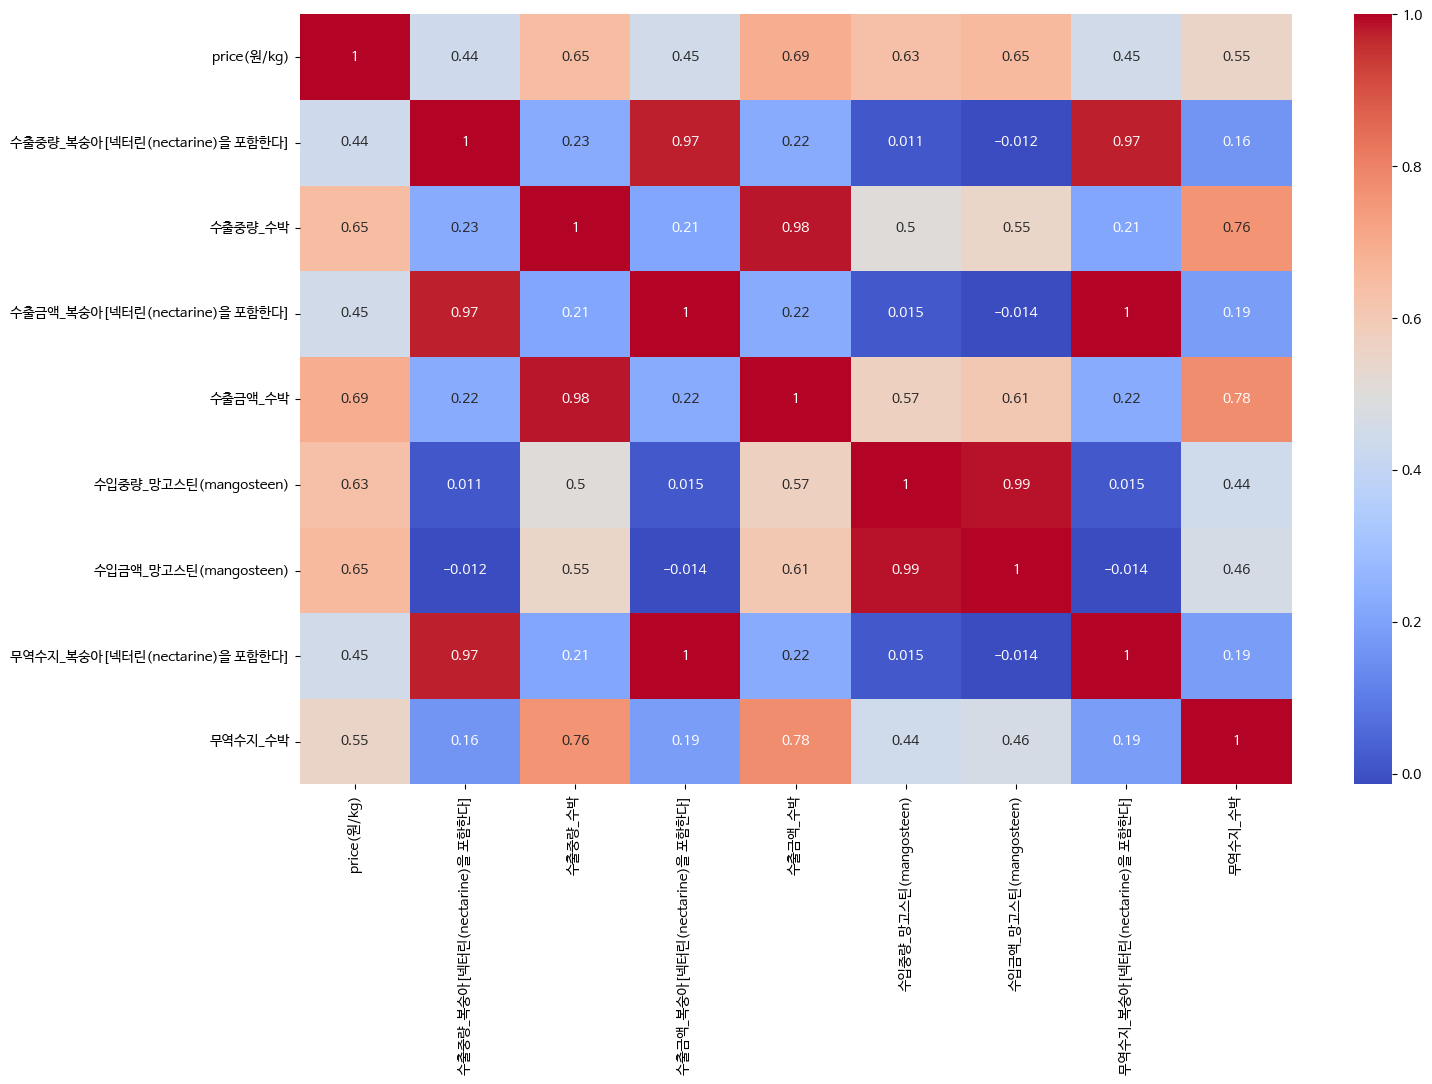

Index(['수출중량_복숭아[넥터린(nectarine)을 포함한다]', '수출중량_수박',
       '수출금액_복숭아[넥터린(nectarine)을 포함한다]', '수출금액_수박', '수입중량_망고스틴(mangosteen)',
       '수입금액_망고스틴(mangosteen)', '무역수지_복숭아[넥터린(nectarine)을 포함한다]', '무역수지_수박'],
      dtype='object')


In [ ]:
find_plotting_high_corr('TG', 0.4)
print(TG_high_corr)

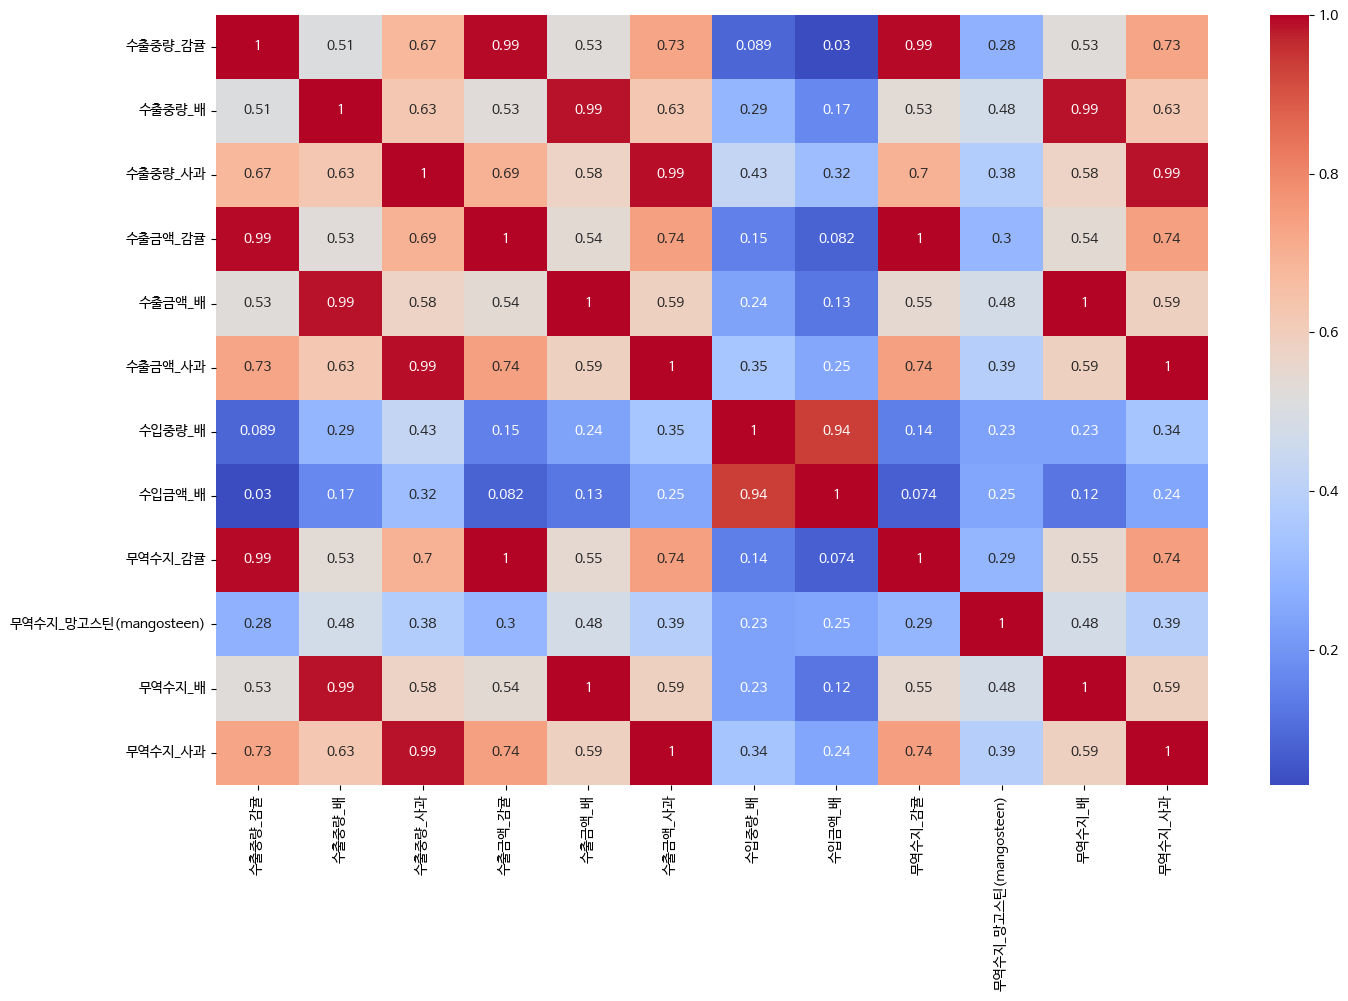

Index(['수출중량_감귤', '수출중량_배', '수출중량_사과', '수출금액_감귤', '수출금액_배', '수출금액_사과',
       '수입중량_배', '수입금액_배', '무역수지_감귤', '무역수지_망고스틴(mangosteen)', '무역수지_배',
       '무역수지_사과'],
      dtype='object')


In [ ]:
find_plotting_low_corr('TG', -0.4)
print(TG_low_corr)

##[9-3] CR 브로콜리 연월평균가격 vs pivot trade data
- 상관관계 0.4 초과 :
- 상관관계 -0.4 미만 :

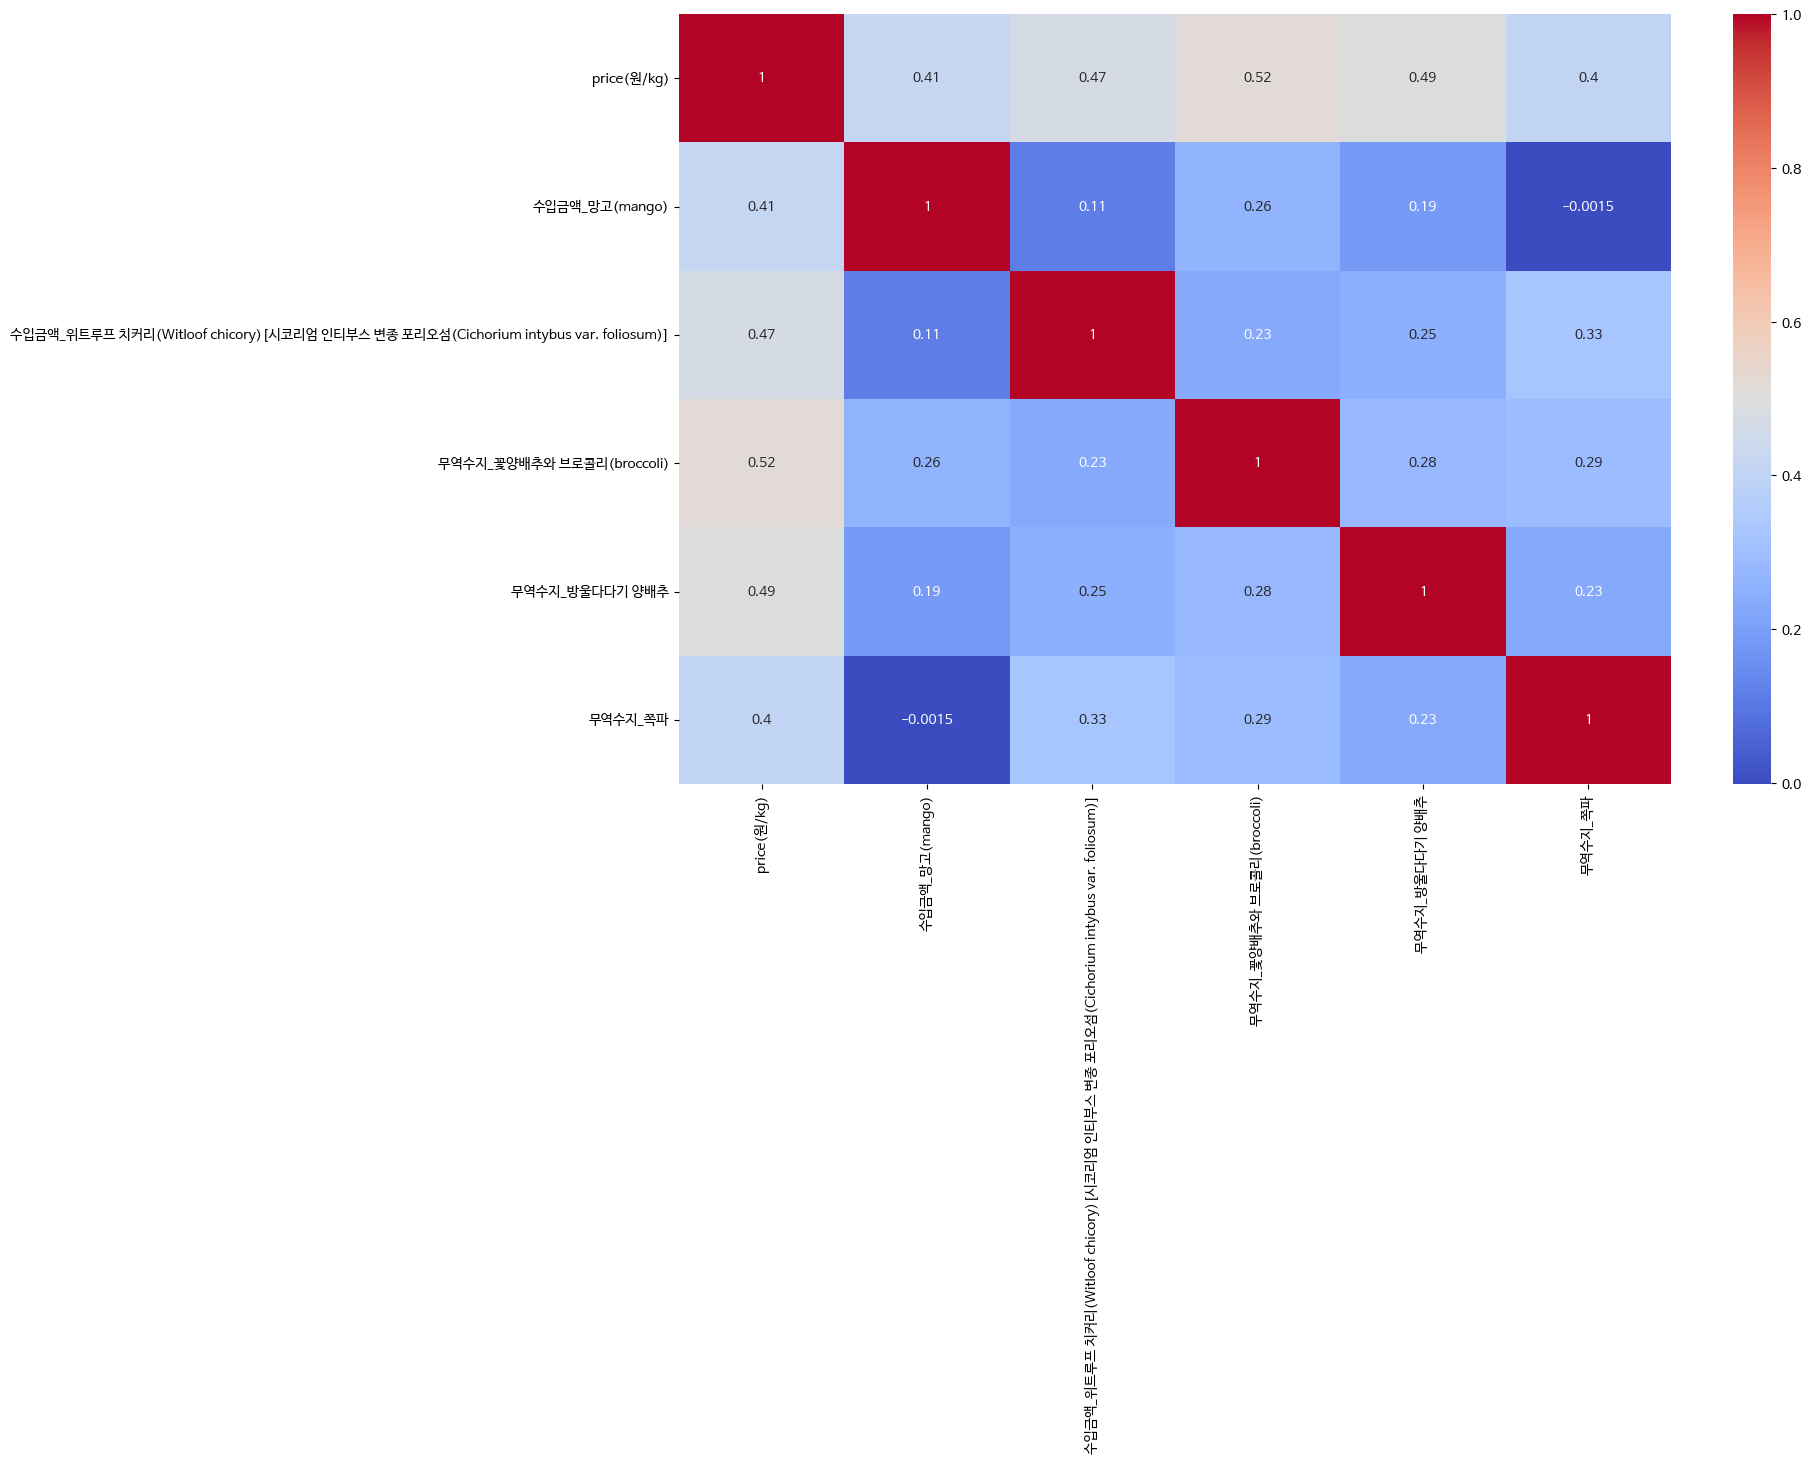

Index(['수입금액_망고(mango)',
       '수입금액_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '무역수지_꽃양배추와 브로콜리(broccoli)', '무역수지_방울다다기 양배추', '무역수지_쪽파'],
      dtype='object')


In [ ]:
find_plotting_high_corr('CR', 0.4)
print(CR_high_corr)

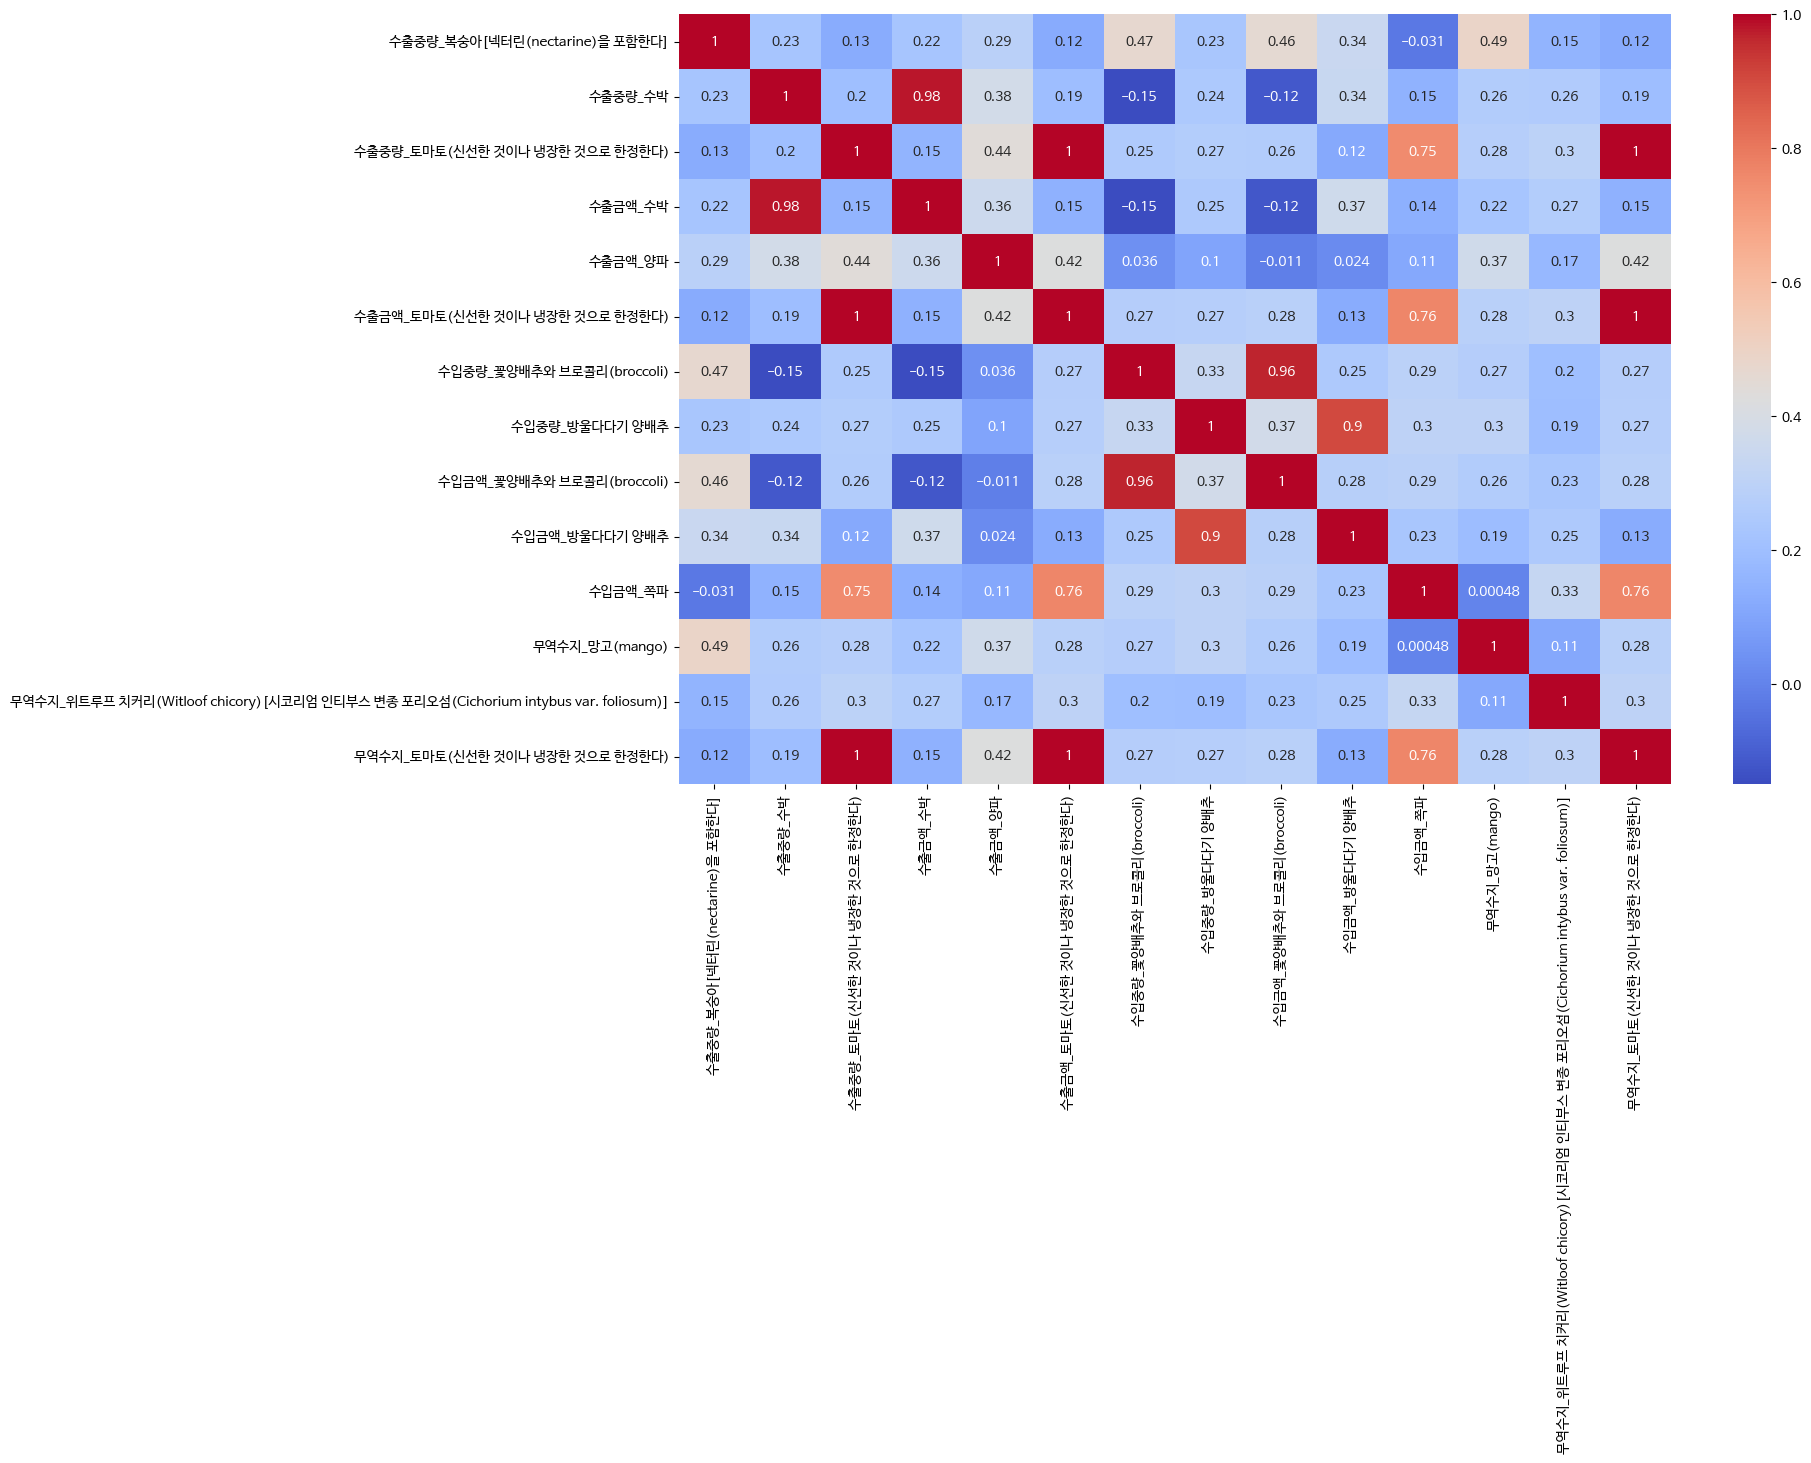

Index(['수출중량_복숭아[넥터린(nectarine)을 포함한다]', '수출중량_수박',
       '수출중량_토마토(신선한 것이나 냉장한 것으로 한정한다)', '수출금액_수박', '수출금액_양파',
       '수출금액_토마토(신선한 것이나 냉장한 것으로 한정한다)', '수입중량_꽃양배추와 브로콜리(broccoli)',
       '수입중량_방울다다기 양배추', '수입금액_꽃양배추와 브로콜리(broccoli)', '수입금액_방울다다기 양배추',
       '수입금액_쪽파', '무역수지_망고(mango)',
       '무역수지_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '무역수지_토마토(신선한 것이나 냉장한 것으로 한정한다)'],
      dtype='object')


In [ ]:
find_plotting_low_corr('CR', -0.4)
print(CR_low_corr)

## [9-4] CB 무 연월평균가격 vs pivot trade data
- 상관관계 0.4 초과 :
- 상관관계 -0.4 미만 :

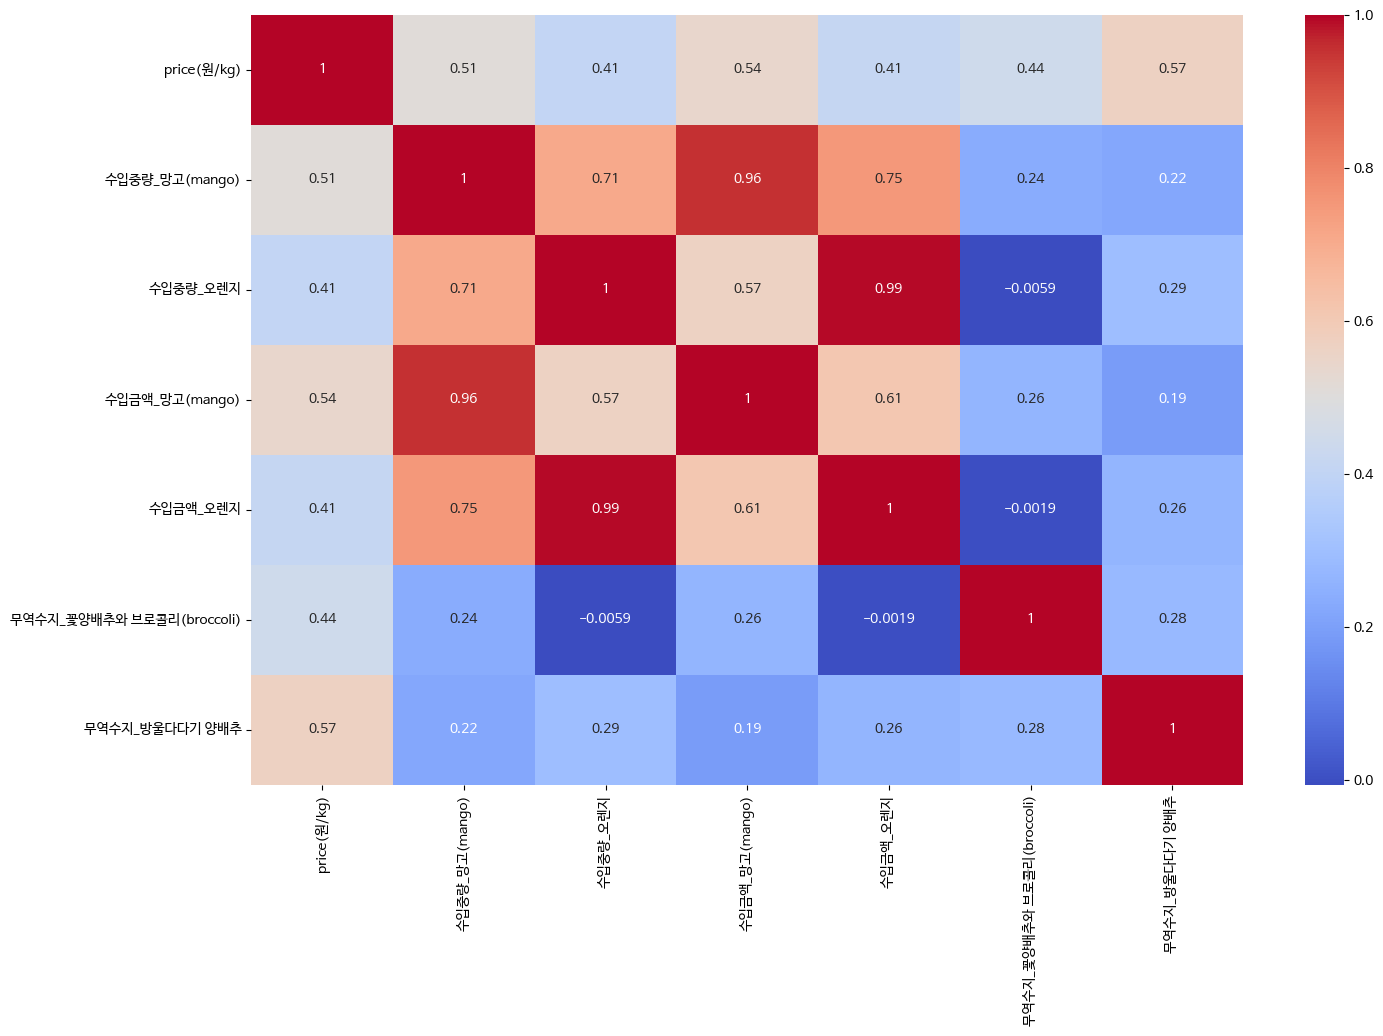

Index(['수입중량_망고(mango)', '수입중량_오렌지', '수입금액_망고(mango)', '수입금액_오렌지',
       '무역수지_꽃양배추와 브로콜리(broccoli)', '무역수지_방울다다기 양배추'],
      dtype='object')


In [ ]:
find_plotting_high_corr('CB', 0.4)
print(CB_high_corr)

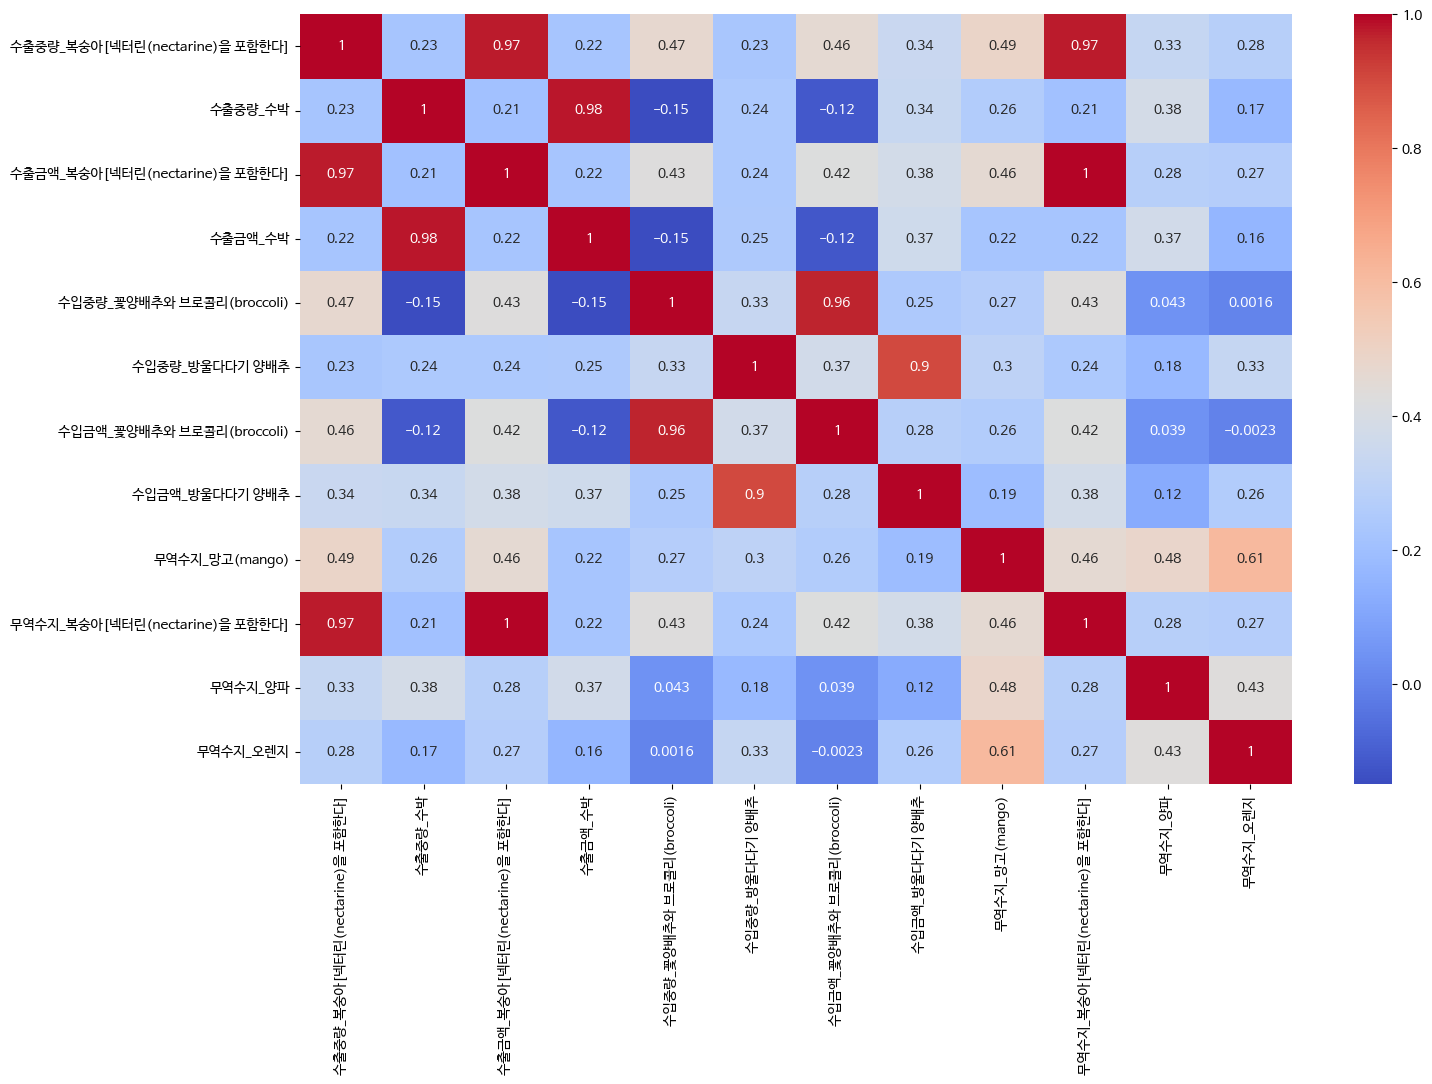

Index(['수출중량_복숭아[넥터린(nectarine)을 포함한다]', '수출중량_수박',
       '수출금액_복숭아[넥터린(nectarine)을 포함한다]', '수출금액_수박',
       '수입중량_꽃양배추와 브로콜리(broccoli)', '수입중량_방울다다기 양배추',
       '수입금액_꽃양배추와 브로콜리(broccoli)', '수입금액_방울다다기 양배추', '무역수지_망고(mango)',
       '무역수지_복숭아[넥터린(nectarine)을 포함한다]', '무역수지_양파', '무역수지_오렌지'],
      dtype='object')


In [ ]:
find_plotting_low_corr('CB', -0.4)
print(CB_low_corr)

##[9-5] RD 당근 연월평균가격 vs pivot trade data

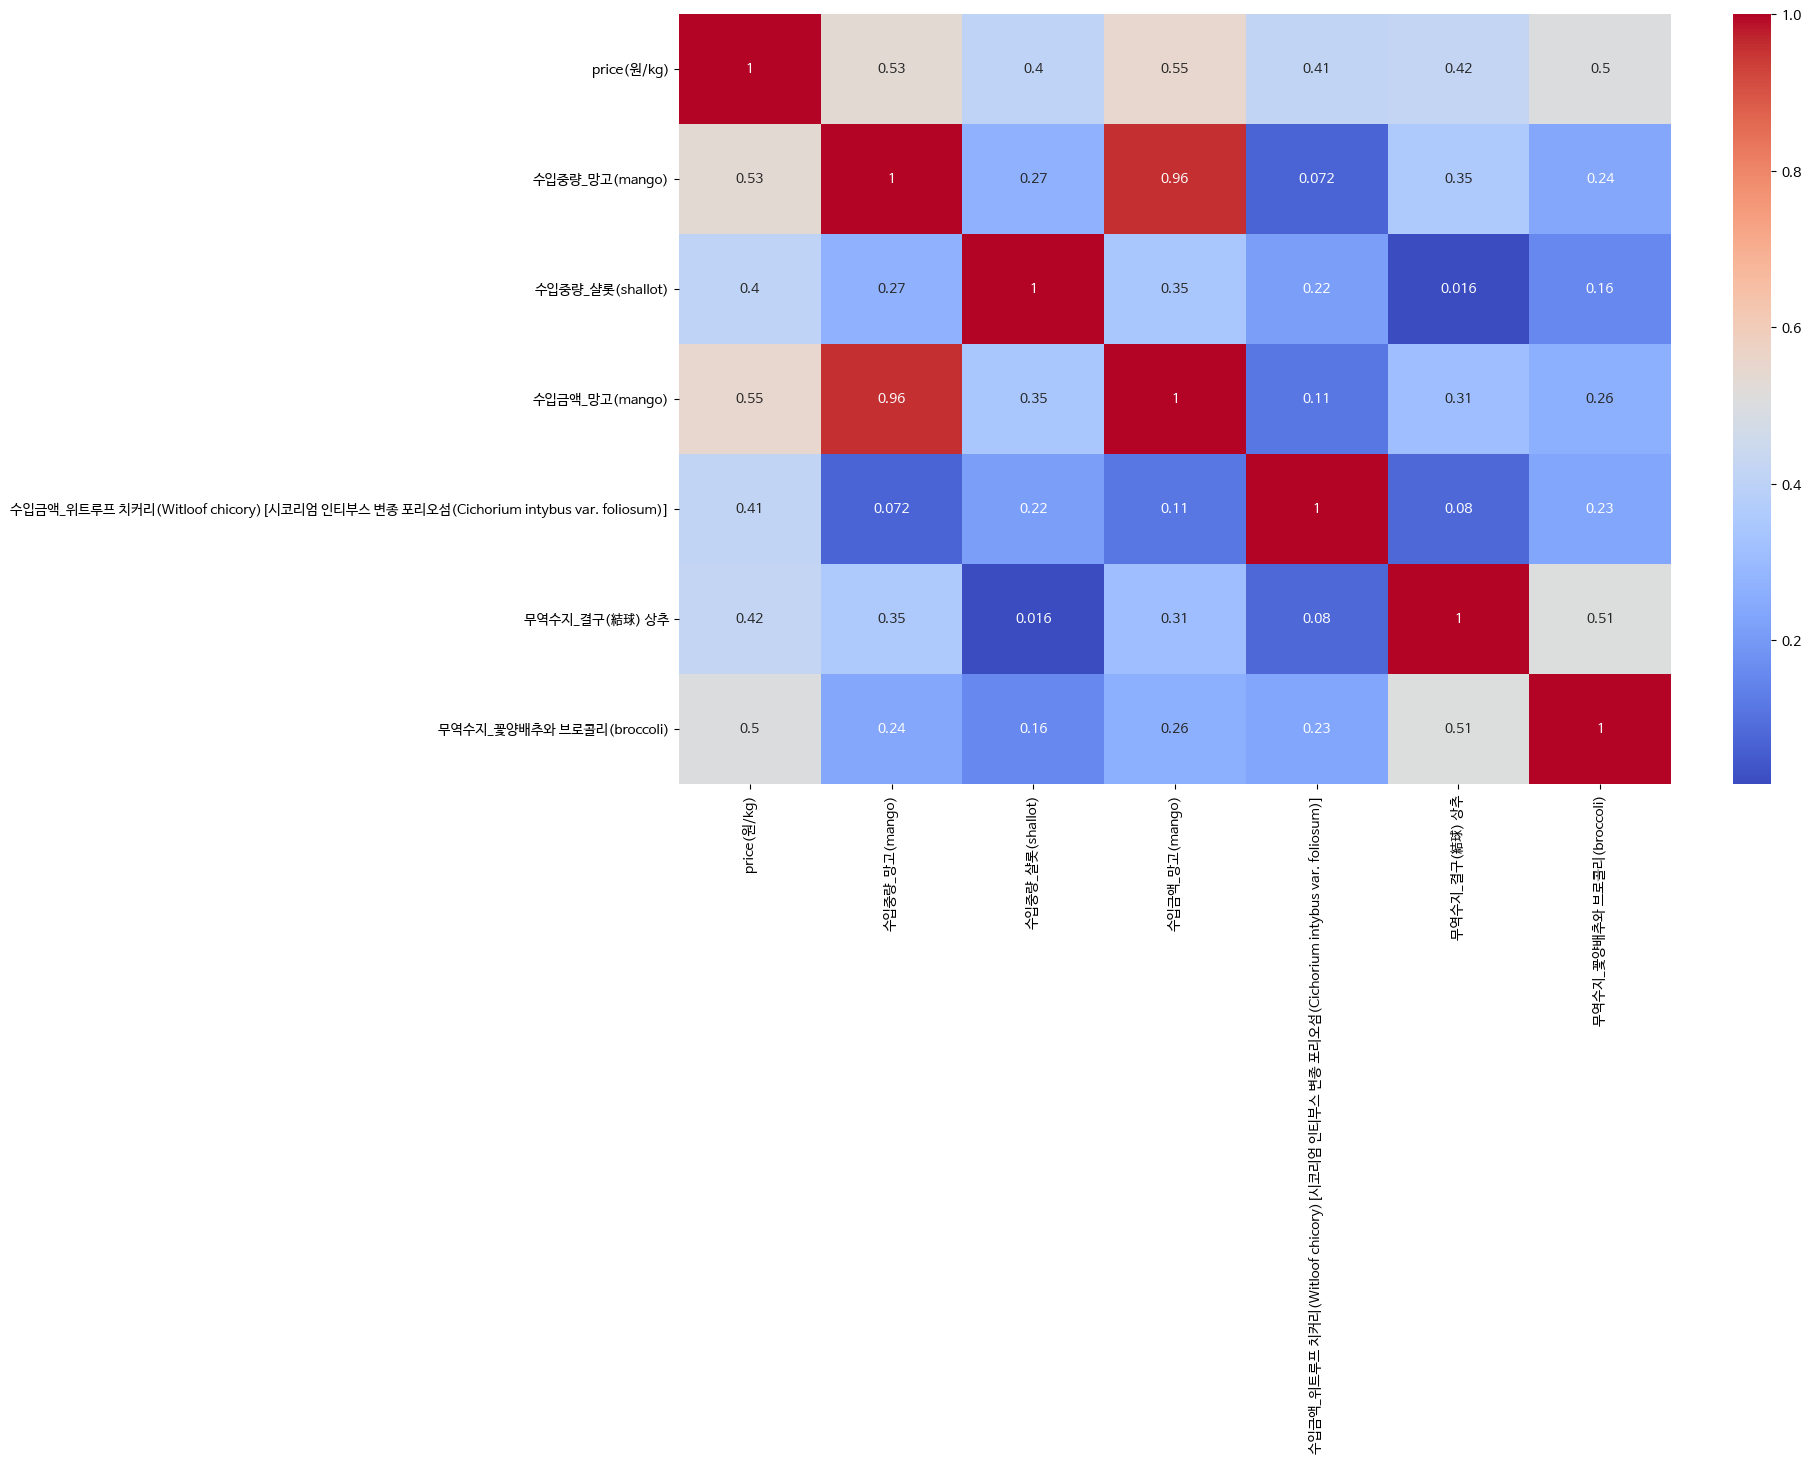

Index(['수입중량_망고(mango)', '수입중량_샬롯(shallot)', '수입금액_망고(mango)',
       '수입금액_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '무역수지_결구(結球) 상추', '무역수지_꽃양배추와 브로콜리(broccoli)'],
      dtype='object')


In [ ]:
find_plotting_high_corr('RD', 0.4)
print(RD_high_corr)

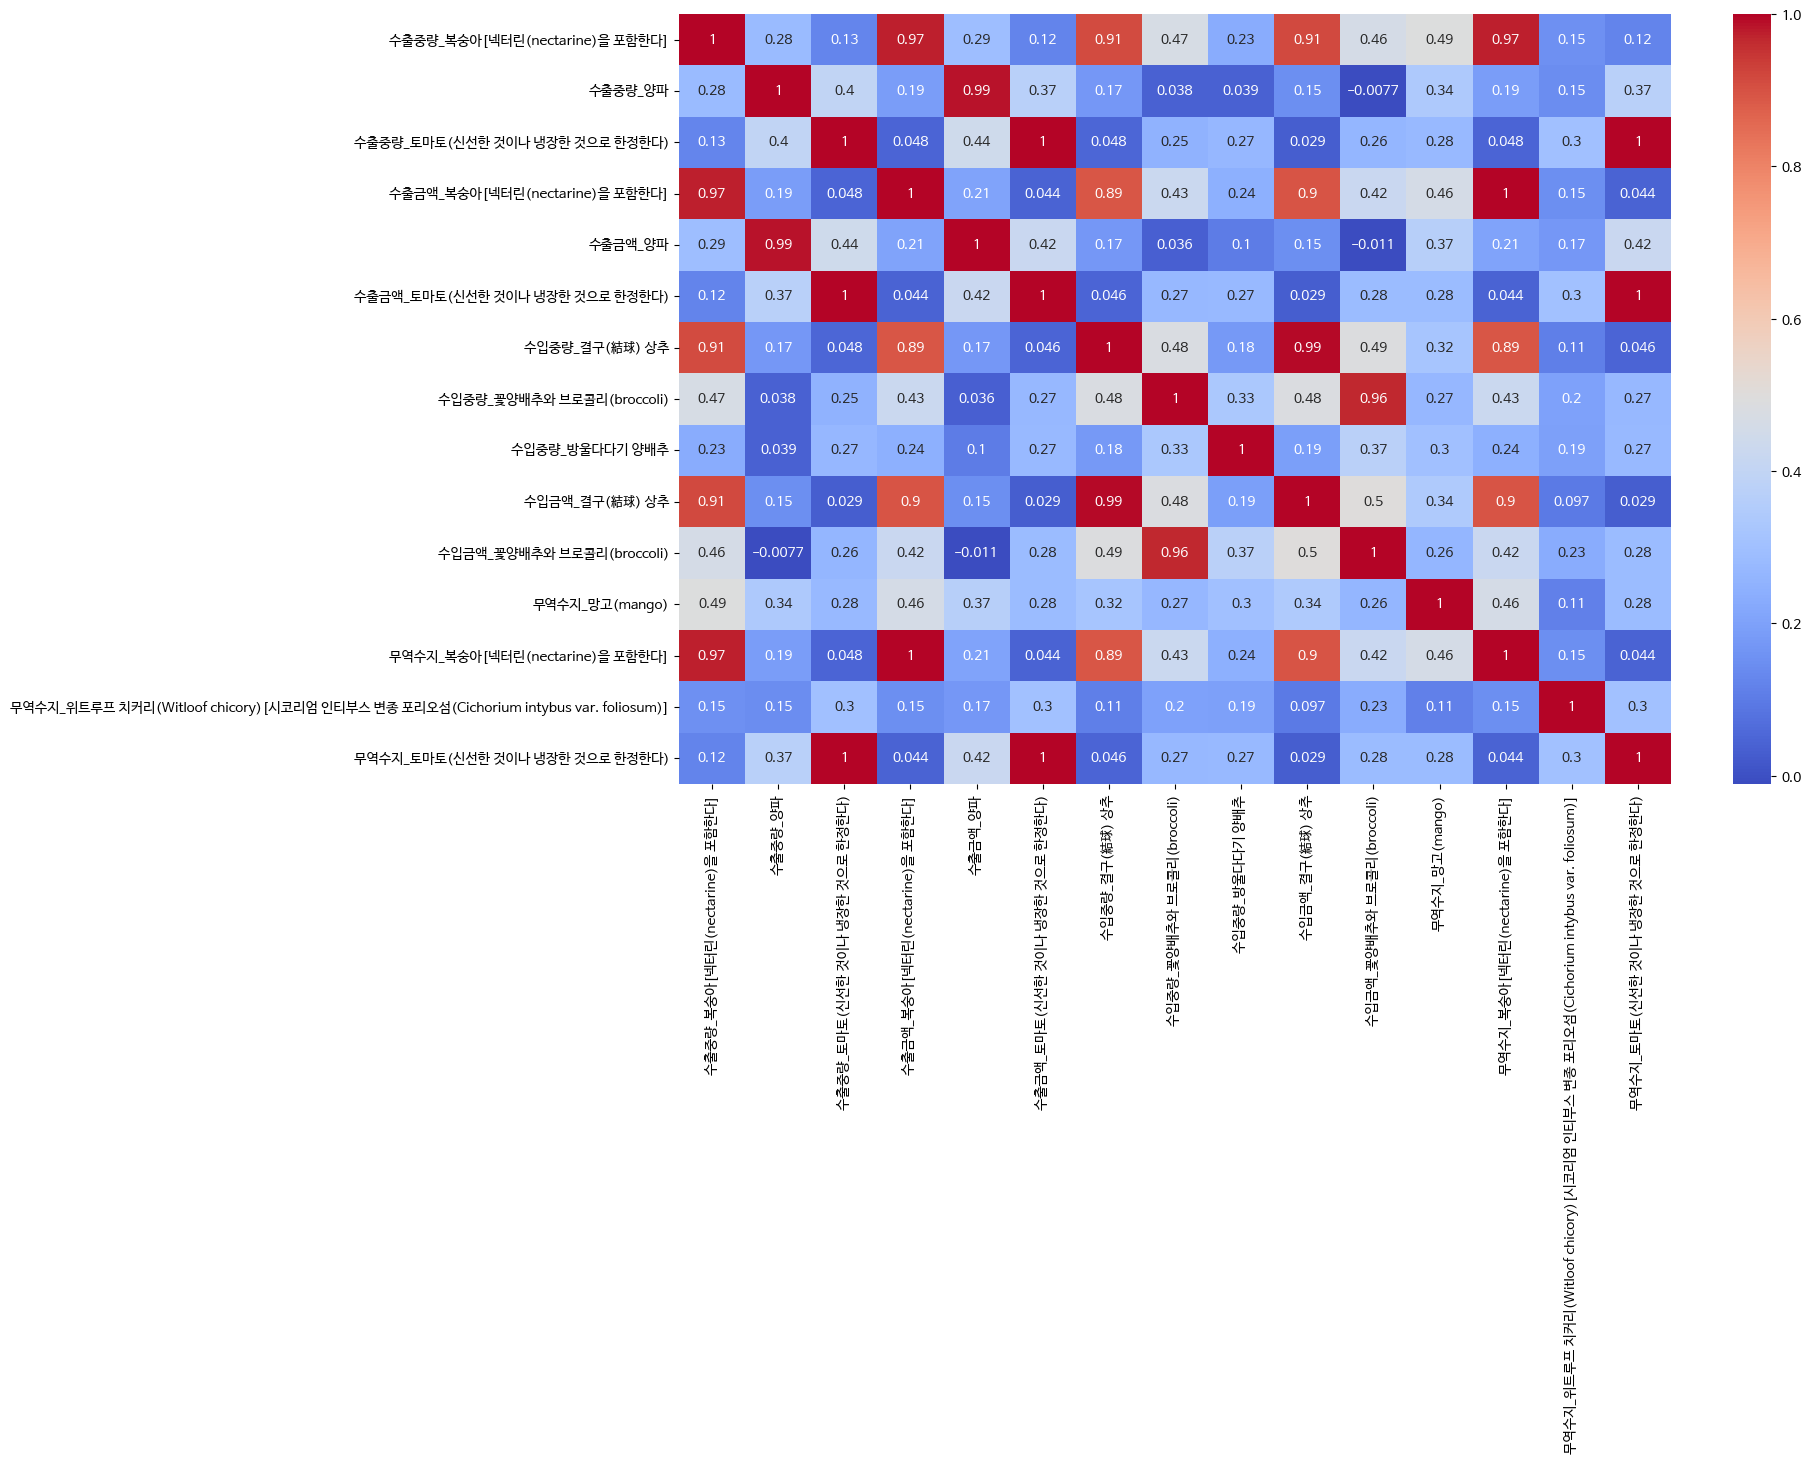

Index(['수출중량_복숭아[넥터린(nectarine)을 포함한다]', '수출중량_양파',
       '수출중량_토마토(신선한 것이나 냉장한 것으로 한정한다)', '수출금액_복숭아[넥터린(nectarine)을 포함한다]',
       '수출금액_양파', '수출금액_토마토(신선한 것이나 냉장한 것으로 한정한다)', '수입중량_결구(結球) 상추',
       '수입중량_꽃양배추와 브로콜리(broccoli)', '수입중량_방울다다기 양배추', '수입금액_결구(結球) 상추',
       '수입금액_꽃양배추와 브로콜리(broccoli)', '무역수지_망고(mango)',
       '무역수지_복숭아[넥터린(nectarine)을 포함한다]',
       '무역수지_위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '무역수지_토마토(신선한 것이나 냉장한 것으로 한정한다)'],
      dtype='object')


In [ ]:
find_plotting_low_corr('RD', -0.4)
print(RD_low_corr)